# Máster en Data Science - Machine Learning

# Tratamiento de Valores missing, outlier y correlaciones
Autor: Ramón Morillo Barrera

## Dataset: Application data

En este notebook trabajaremos en el análisis exploratorio gráfico con el objetivo de visualizar y entender el comportamiento de las variables. Trabajaremos en el tratamiento de valores nulos o missing, outliers y estudiaremos la correlacion entre variables.

Como comentamos anteriormente, se llevará a cabo una separación estratificada en el paso de train-test split debido al desbalanceo de la variable objetivo.

#### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from termcolor import colored, cprint
import scipy.stats as ss
import warnings
import sys
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Funciones

In [2]:
sys.path.append('../src')
import funciones_auxiliares as f_aux
sys.path.remove('../src')

# Constante
seed = 12354

#### Importo el dataset

In [3]:
df_loan = pd.read_csv('../../data_loan_status/data_preprocessing/pd_data_initial_preprocessing.csv')
df_loan.head()

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
0      100002          0.0143           0.0144           0.0144   
1      100003          0.0605           0.0608           0.0497   
2      100004             NaN              NaN              NaN   
3      100006             NaN              NaN              NaN   
4      100007             NaN              NaN              NaN   

   NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MEDI  \
0                   0.0000                    0.0000   
1                   0.0039                    0.0039   
2                      NaN                       NaN   
3                      NaN                       NaN   
4                      NaN                       NaN   

   NONLIVINGAPARTMENTS_MODE FONDKAPREMONT_MODE  LIVINGAPARTMENTS_MEDI  \
0                       0.0   reg oper account                 0.0205   
1                       0.0   reg oper account                 0.0787   
2                       NaN                NaN                    NaN   
3                       NaN                NaN                    NaN   
4                       NaN                NaN                    NaN   

   LIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_MODE  FLOORSMIN_MODE  FLOORSMIN_AVG  \
0                0.0202                  0.022          0.1250         0.1250   
1                0.0773                  0.079          0.3333         0.3333   
2                   NaN                    NaN             NaN            NaN   
3                   NaN                    NaN             NaN            NaN   
4                   NaN                    NaN             NaN            NaN   

   FLOORSMIN_MEDI  YEARS_BUILD_MODE  YEARS_BUILD_MEDI  YEARS_BUILD_AVG  \
0          0.1250            0.6341            0.6243           0.6192   
1          0.3333            0.8040            0.7987           0.7960   
2             NaN               NaN               NaN              NaN   
3             NaN               NaN               NaN              NaN   
4             NaN               NaN               NaN              NaN   

   OWN_CAR_AGE  LANDAREA_MEDI  LANDAREA_AVG  LANDAREA_MODE  BASEMENTAREA_MODE  \
0          NaN         0.0375        0.0369         0.0377             0.0383   
1          NaN         0.0132        0.0130         0.0128             0.0538   
2         26.0            NaN           NaN            NaN                NaN   
3          NaN            NaN           NaN            NaN                NaN   
4          NaN            NaN           NaN            NaN                NaN   

   BASEMENTAREA_AVG  BASEMENTAREA_MEDI  EXT_SOURCE_1  NONLIVINGAREA_AVG  \
0            0.0369             0.0369      0.083037             0.0000   
1            0.0529             0.0529      0.311267             0.0098   
2               NaN                NaN           NaN                NaN   
3               NaN                NaN           NaN                NaN   
4               NaN                NaN           NaN                NaN   

   NONLIVINGAREA_MODE  NONLIVINGAREA_MEDI  ELEVATORS_MEDI  ELEVATORS_AVG  \
0                 0.0                0.00            0.00           0.00   
1                 0.0                0.01            0.08           0.08   
2                 NaN                 NaN             NaN            NaN   
3                 NaN                 NaN             NaN            NaN   
4                 NaN                 NaN             NaN            NaN   

   ELEVATORS_MODE WALLSMATERIAL_MODE  APARTMENTS_AVG  APARTMENTS_MODE  \
0          0.0000       Stone, brick          0.0247           0.0252   
1          0.0806              Block          0.0959           0.0924   
2             NaN                NaN             NaN              NaN   
3             NaN                NaN             NaN              NaN   
4             NaN                NaN             NaN              NaN   

   APARTMENTS_MEDI  ENTRANCES_MEDI  ENTRANCES_MODE  ENTRAN

In [4]:
df_loan.columns

Index(['SK_ID_CURR', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       ...
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object', length=122)

### Cambio de tipo de variables categóricas

Cambio el tipo de las variables object a category

In [5]:
list_var_cat, other = f_aux.dame_variables_categoricas(dataset=df_loan)
df_loan[list_var_cat] = df_loan[list_var_cat].astype("category")
list_var_continuous = list(df_loan.select_dtypes('float').columns)
df_loan[list_var_continuous] = df_loan[list_var_continuous].astype(float)
df_loan.dtypes

SK_ID_CURR                         int64
COMMONAREA_AVG                   float64
COMMONAREA_MEDI                  float64
COMMONAREA_MODE                  float64
NONLIVINGAPARTMENTS_AVG          float64
NONLIVINGAPARTMENTS_MEDI         float64
NONLIVINGAPARTMENTS_MODE         float64
FONDKAPREMONT_MODE              category
LIVINGAPARTMENTS_MEDI            float64
LIVINGAPARTMENTS_AVG             float64
LIVINGAPARTMENTS_MODE            float64
FLOORSMIN_MODE                   float64
FLOORSMIN_AVG                    float64
FLOORSMIN_MEDI                   float64
YEARS_BUILD_MODE                 float64
YEARS_BUILD_MEDI                 float64
YEARS_BUILD_AVG                  float64
OWN_CAR_AGE                      float64
LANDAREA_MEDI                    float64
LANDAREA_AVG                     float64
LANDAREA_MODE                    float64
BASEMENTAREA_MODE                float64
BASEMENTAREA_AVG                 float64
BASEMENTAREA_MEDI                float64
EXT_SOURCE_1    

### Separación Train-Test estratificada

Separaré el dataset en train y test manteniendo la proporción de la variable objetivo. Pero antes, voy a graficar la proporción de dicha variable.

In [6]:
target_count = df_loan.groupby('TARGET').agg({'TARGET':'count'}).reset_index(drop=True)
target_count['value'] = list(target_count.index)
target_count

TARGET  value
0  282686      0
1   24825      1

In [7]:
df_plot_loan_status = df_loan['TARGET']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

df_plot_loan_status_conteo = df_loan['TARGET'].value_counts(normalize=True).reset_index()
df_plot_loan_status_conteo

TARGET  proportion
0       0    0.919271
1       1    0.080729

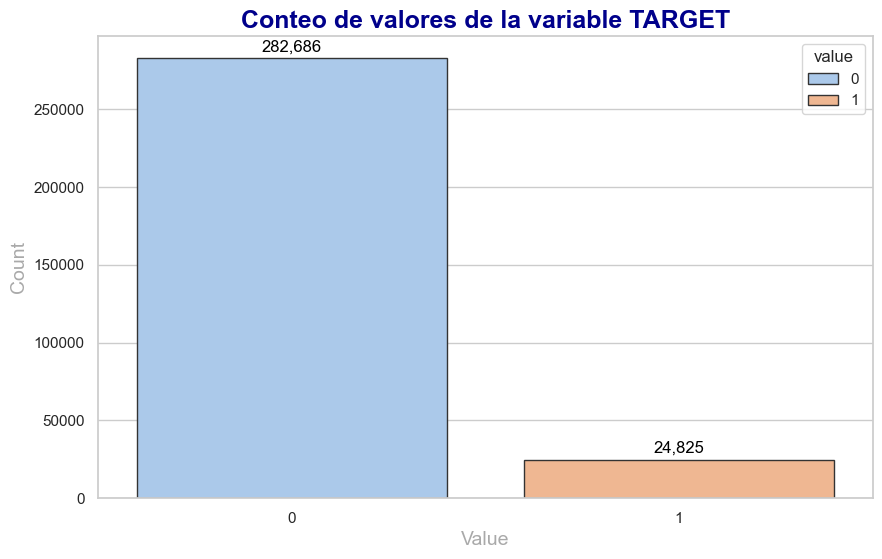

In [8]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))  # Aumenta el tamaño de la gráfica

# Grafico de barras
sns.barplot(
    data=target_count, 
    x='value', 
    y='TARGET', 
    ax=ax, 
    hue='value', 
    dodge=False,  # Evita separación entre barras
    palette="pastel",  
    edgecolor="0.2"    # Añade bordes a las barras
)

# Título y etiquetas de ejes 
ax.set_title('Conteo de valores de la variable TARGET', fontsize=18, fontweight='bold', color='darkblue')
ax.set_ylabel('Count', fontsize=14, color='darkgrey')
ax.set_xlabel('Value', fontsize=14, color='darkgrey')

# Añade las etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type="edge", padding=3, fontsize=12, color="black")

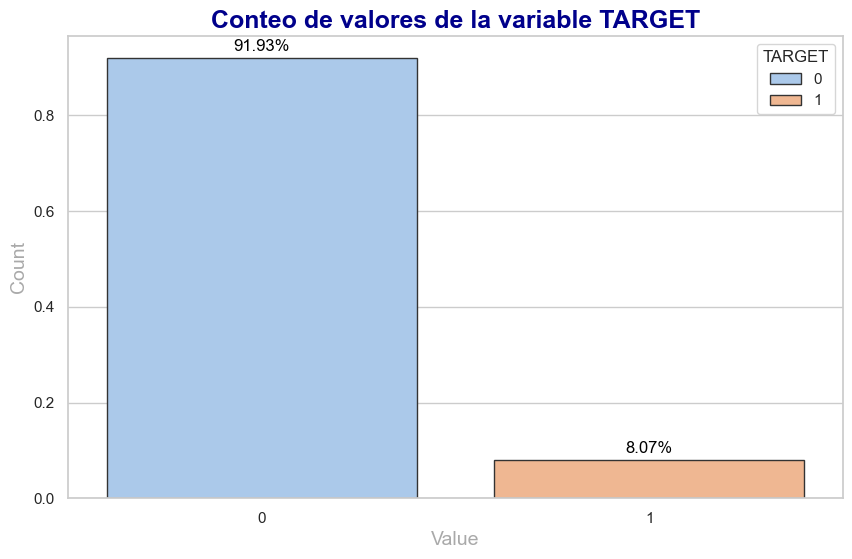

In [9]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))  # Aumenta el tamaño de la gráfica

# Grafico de barras
sns.barplot(
    data=df_plot_loan_status_conteo, 
    x='TARGET', 
    y='proportion', 
    ax=ax, 
    hue='TARGET', 
    dodge=False,  # Evita separación entre barras
    palette="pastel",  
    edgecolor="0.2"    # Añade bordes a las barras
)

# Título y etiquetas de ejes 
ax.set_title('Conteo de valores de la variable TARGET', fontsize=18, fontweight='bold', color='darkblue')
ax.set_ylabel('Count', fontsize=14, color='darkgrey')
ax.set_xlabel('Value', fontsize=14, color='darkgrey')

# Añade las etiquetas de conteo encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2%}', label_type="edge", padding=3, fontsize=12, color="black")

Calculé y grafiqué los valores de la variable Target para combrobar que al realizar la separación en train y test las proporciones se mantengan gracias a la estratificación.

In [10]:
from sklearn.model_selection import train_test_split
X_df_loan, X_df_loan_test, y_df_loan, y_df_loan_test = train_test_split(df_loan.drop('TARGET',axis=1), 
                                                                     df_loan['TARGET'], 
                                                                     stratify=df_loan['TARGET'], 
                                                                     test_size=0.2)
df_loan_train = pd.concat([X_df_loan, y_df_loan],axis=1)
df_loan_test = pd.concat([X_df_loan_test, y_df_loan_test],axis=1)

In [11]:
print(f'''
\033[1mTRAIN\033[0m:
{y_df_loan.value_counts(normalize=True)}

\033[1mTEST\033[0m:
{y_df_loan_test.value_counts(normalize=True)}''')


TRAIN:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

TEST:
TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


La separación estratificada se realizó correctamente. Observamos la misma proporción de la variable TARGET tanto en train como en test.

### Visualización descriptiva de los datos

Vamos a observar la proporción de valores nulos en columnas y filas, además de una visualización descriptiva de la relación de las demás variables con la variable TARGET

In [12]:
pd_series_null_columns = df_loan_train.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = df_loan_train.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)

pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['TARGET'] = df_loan['TARGET'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/df_loan_train.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/df_loan_train.shape[1]

(122,) (246008,)


In [13]:
pd_null_columnas

nulos_columnas  porcentaje_columnas
COMMONAREA_AVG                        171998             0.699156
COMMONAREA_MEDI                       171998             0.699156
COMMONAREA_MODE                       171998             0.699156
NONLIVINGAPARTMENTS_MODE              170964             0.694953
NONLIVINGAPARTMENTS_AVG               170964             0.694953
NONLIVINGAPARTMENTS_MEDI              170964             0.694953
FONDKAPREMONT_MODE                    168327             0.684234
LIVINGAPARTMENTS_MEDI                 168303             0.684136
LIVINGAPARTMENTS_AVG                  168303             0.684136
LIVINGAPARTMENTS_MODE                 168303             0.684136
FLOORSMIN_AVG                         167005             0.678860
FLOORSMIN_MODE                        167005             0.678860
FLOORSMIN_MEDI                        167005             0.678860
YEARS_BUILD_MODE                      163691             0.665389
YEARS_BUILD_AVG                       163691             0.665389
YEARS_BUILD_MEDI                      163691             0.665389
OWN_CAR_AGE                           162390             0.660100
LANDAREA_MEDI                         146209             0.594326
LANDAREA_MODE                         146209             0.594326
LANDAREA_AVG                          146209             0.594326
BASEMENTAREA_AVG                      144090             0.585713
BASEMENTAREA_MODE                     144090             0.585713
BASEMENTAREA_MEDI                     144090             0.585713
EXT_SOURCE_1                          138768             0.564079
NONLIVINGAREA_AVG                     135881             0.552344
NONLIVINGAREA_MODE                    135881             0.552344
NONLIVINGAREA_MEDI                    135881             0.552344
ELEVATORS_MODE                        131239             0.533475
ELEVATORS_MEDI                        131239             0.533475
ELEVATORS_AVG                         131239             0.533475
WALLSMATERIAL_MODE                    125200             0.508927
APARTMENTS_MEDI                       124968             0.507983
APARTMENTS_AVG                        124968             0.507983
APARTMENTS_MODE                       124968             0.507983
ENTRANCES_MODE                        124045             0.504232
ENTRANCES_MEDI                        124045             0.504232
ENTRANCES_AVG                         124045             0.504232
LIVINGAREA_AVG                        123611             0.502467
LIVINGAREA_MEDI                       123611             0.502467
LIVINGAREA_MODE                       123611             0.502467
HOUSETYPE_MODE                        123552             0.502228
FLOORSMAX_MODE                        122542             0.498122
FLOORSMAX_MEDI                        122542             0.498122
FLOORSMAX_AVG                         122542             0.498122
YEARS_BEGINEXPLUATATION_AVG           120125             0.488297
YEARS_BEGINEXPLUATATION_MODE          120125             0.488297
YEARS_BEGINEXPLUATATION_MEDI          120125             0.488297
TOTALAREA_MODE                        118868             0.483188
EMERGENCYSTATE_MODE                   116748             0.474570
OCCUPATION_TYPE                        77194             0.313787
EXT_SOURCE_3                           48632             0.197685
AMT_REQ_CREDIT_BUREAU_HOUR             33126             0.134654
AMT_REQ_CREDIT_BUREAU_WEEK             33126             0.134654
AMT_REQ_CREDIT_BUREAU_MON              33126             0.134654
AMT_REQ_CREDIT_BUREAU_YEAR             33126             0.134654
AMT_REQ_CREDIT_BUREAU_DAY              33126             0.134654
AMT_REQ_CREDIT_BUREAU_QRT              33126             0.134654
NAME_TYPE_SUITE                         1041             0.004232
DEF_30_CNT_SOCIAL_CIRCLE                 823             0.003345
OBS_60_CNT_SOCIAL_CIRCLE                 823             0.003345
DEF_

In [14]:
pd_null_filas

nulos_filas  TARGET  porcentaje_filas
244833           61       0               0.5
150206           61       0               0.5
269786           61       0               0.5
269492           61       0               0.5
197736           61       0               0.5
...             ...     ...               ...
213047            0       0               0.0
46856             0       0               0.0
82596             0       0               0.0
166577            0       0               0.0
78273             0       0               0.0

[246008 rows x 3 columns]

Vamos a visualizar la distribución de las variables numéricas y categóricas con la variable TARGET

Genero listas por tipos de variables para visualizarlas a continuación.

In [15]:
df_loan_bool, df_loan_cat, df_loan_num = f_aux.tipos_vars1(df_loan,False)

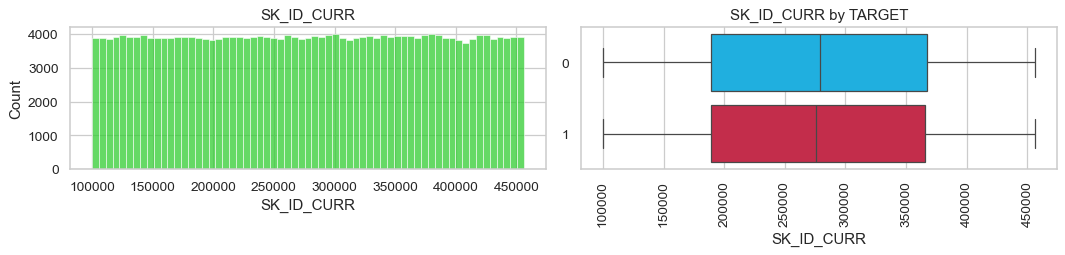

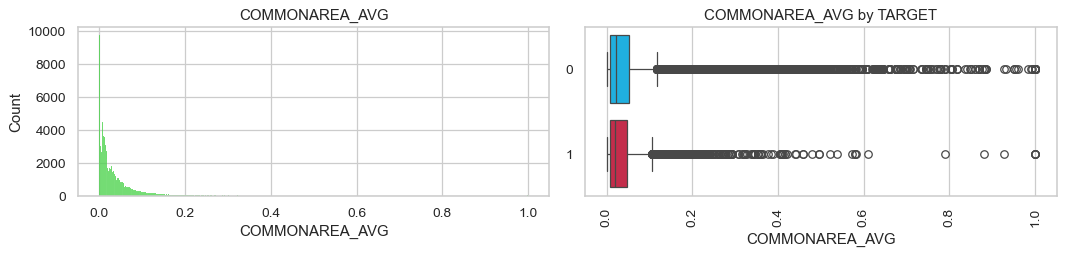

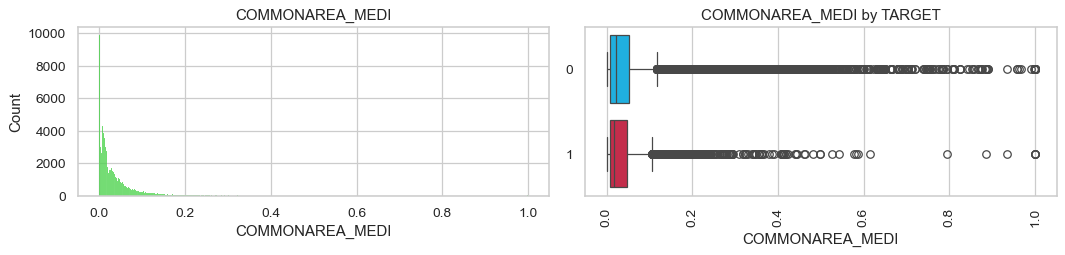

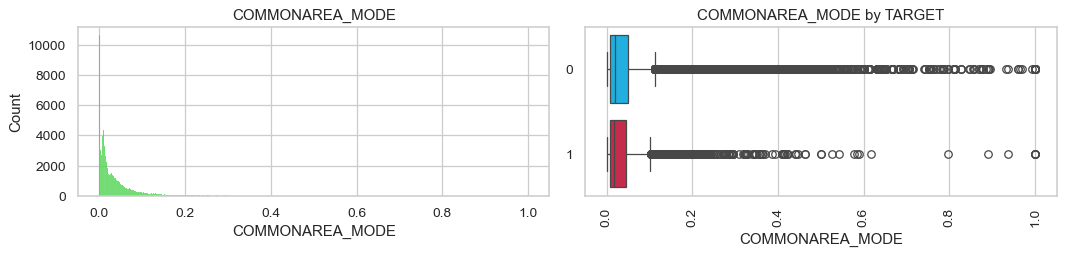

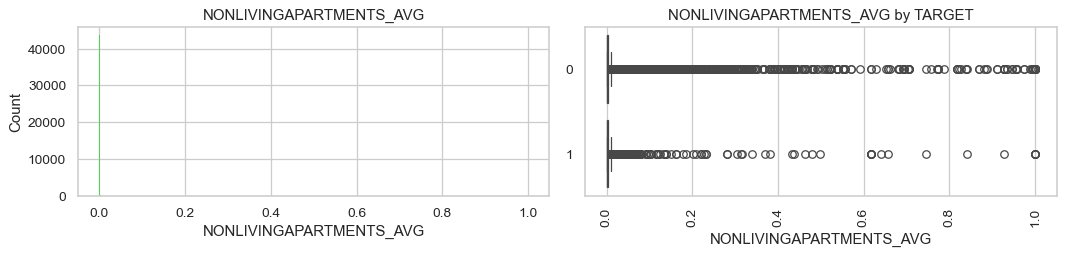

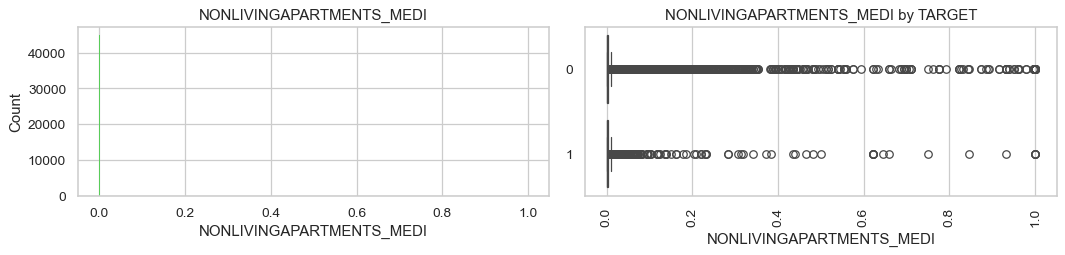

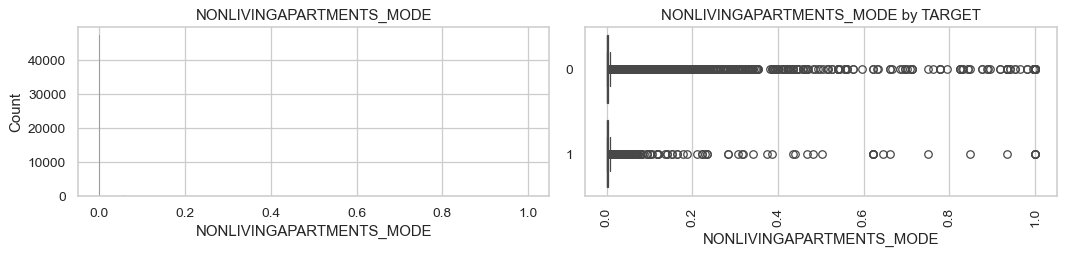

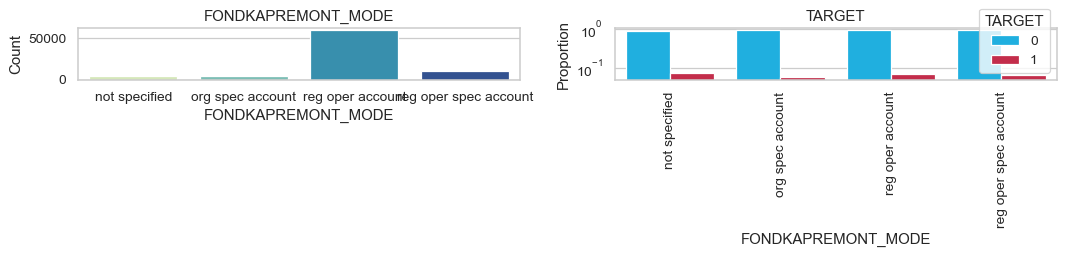

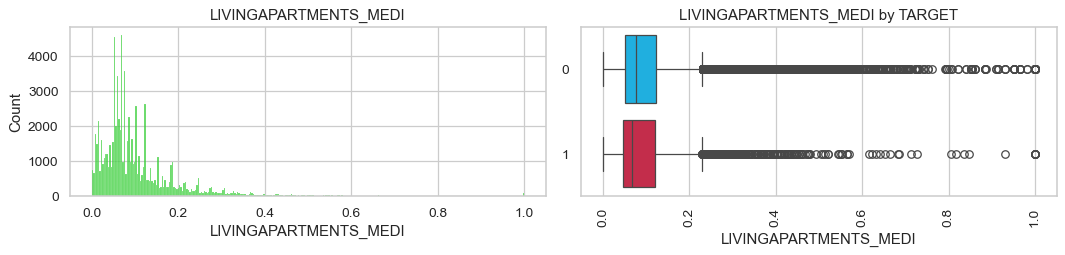

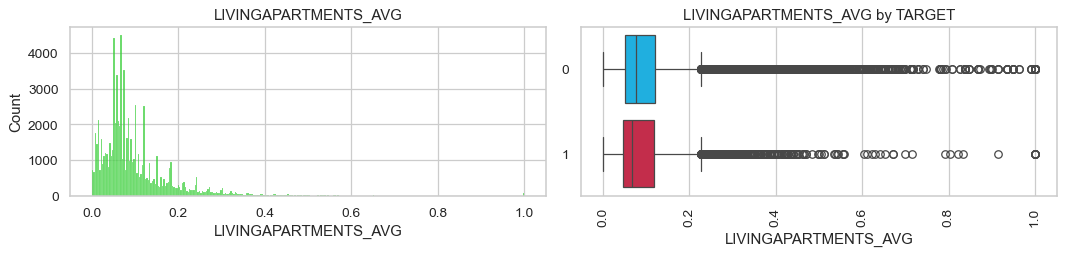

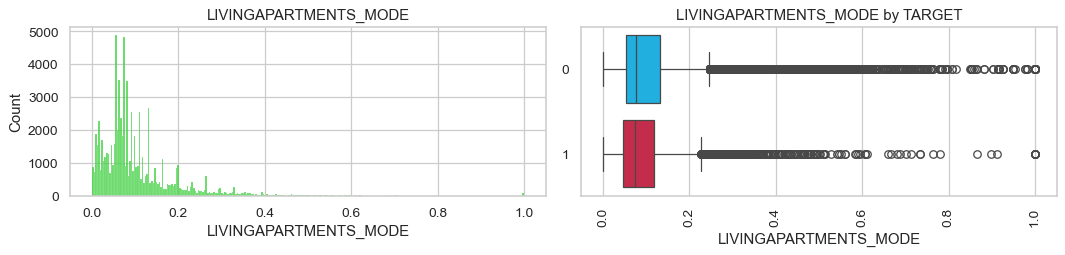

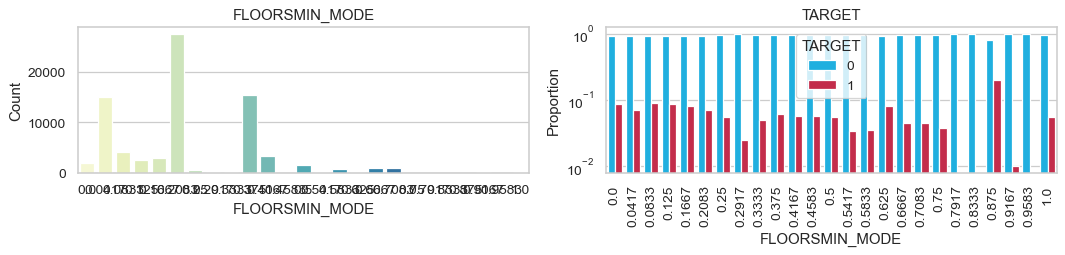

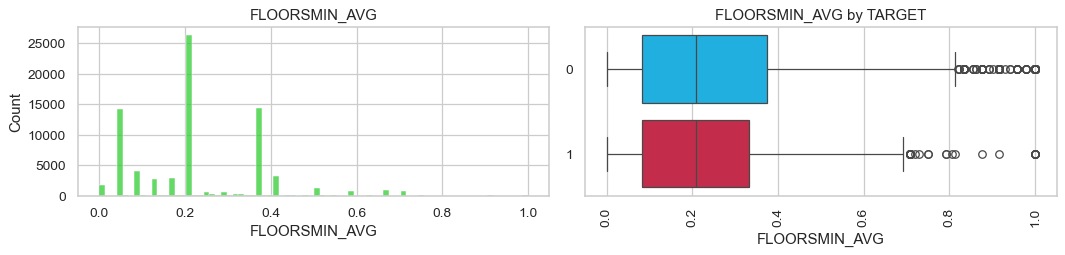

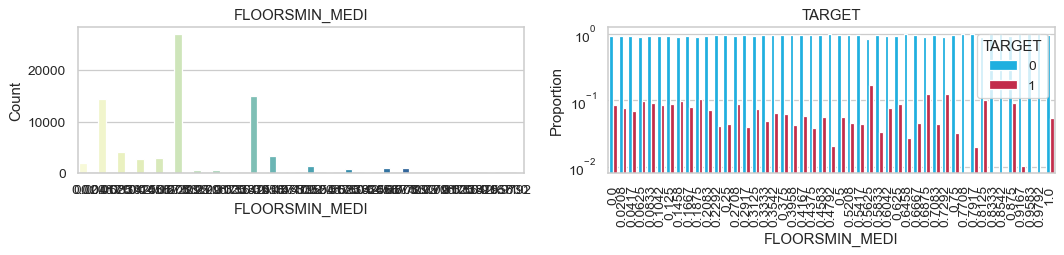

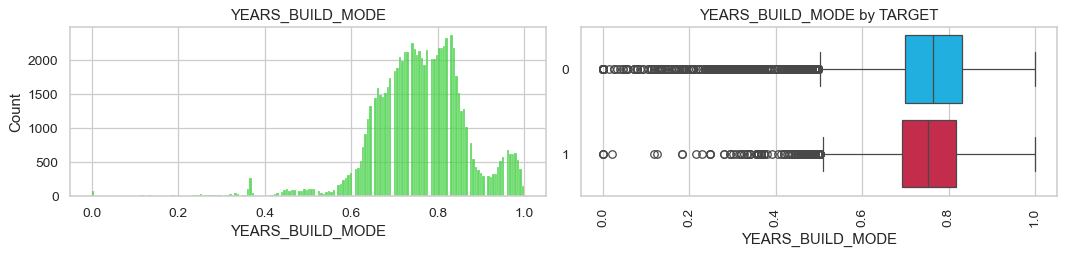

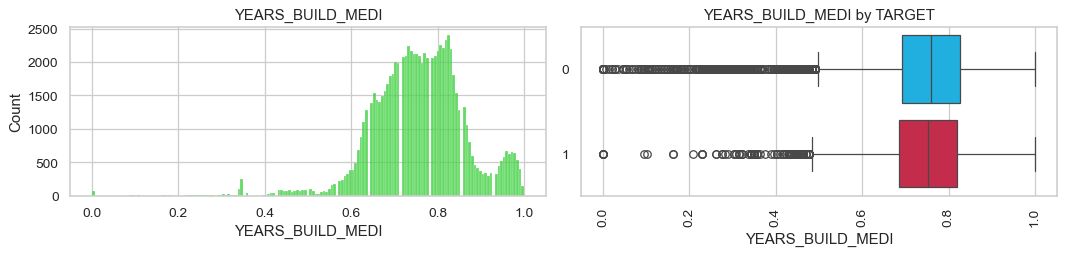

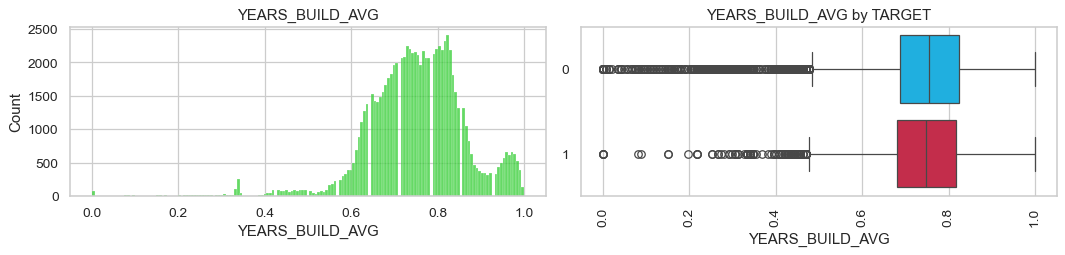

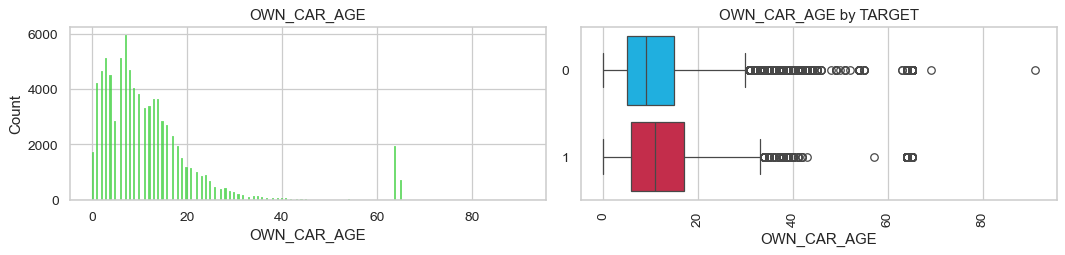

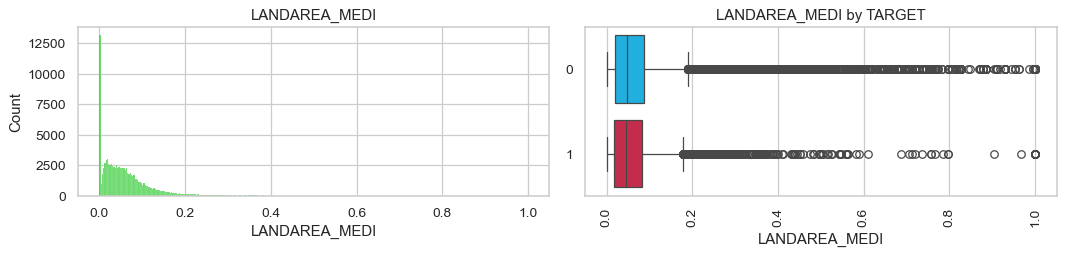

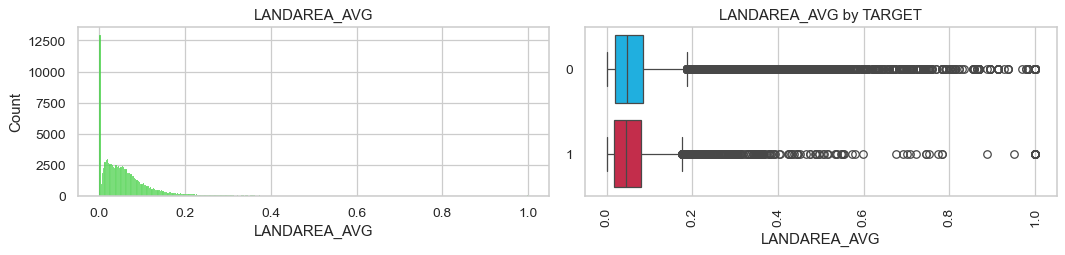

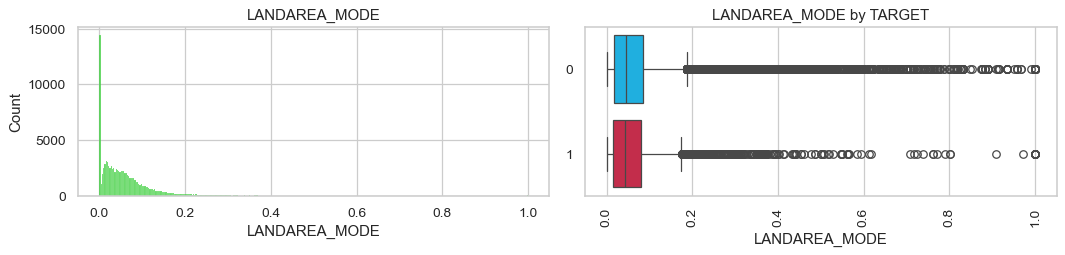

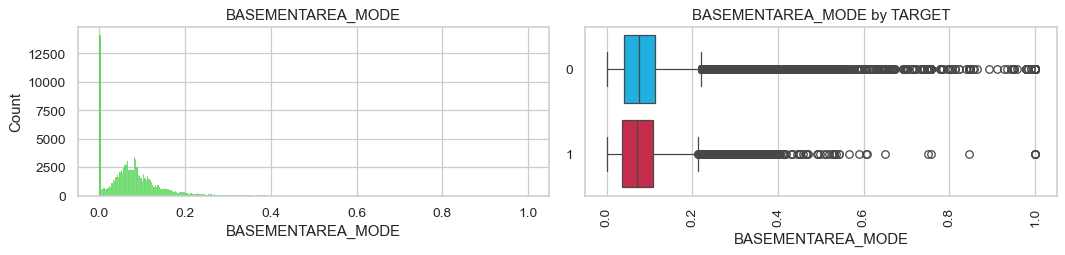

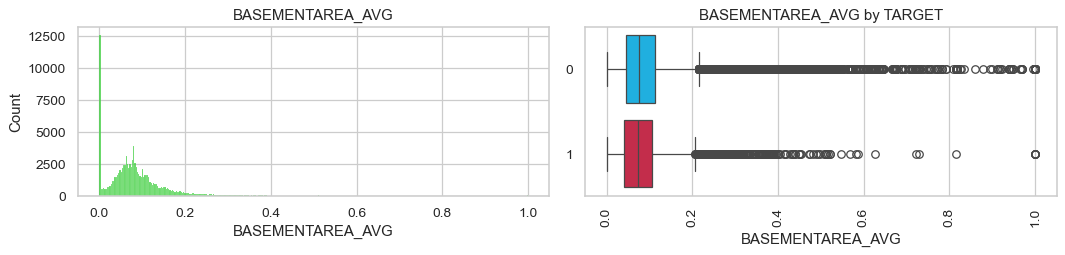

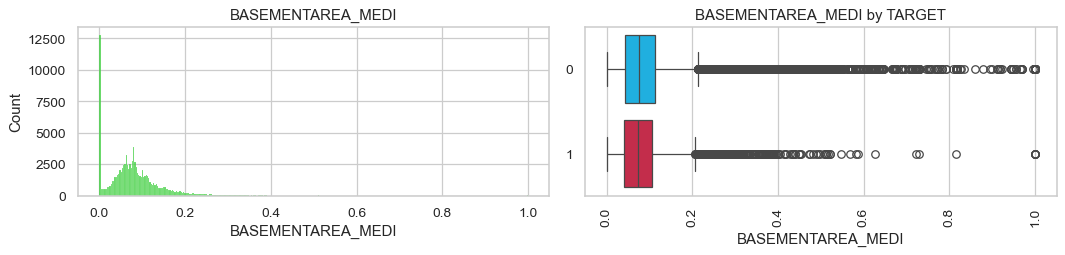

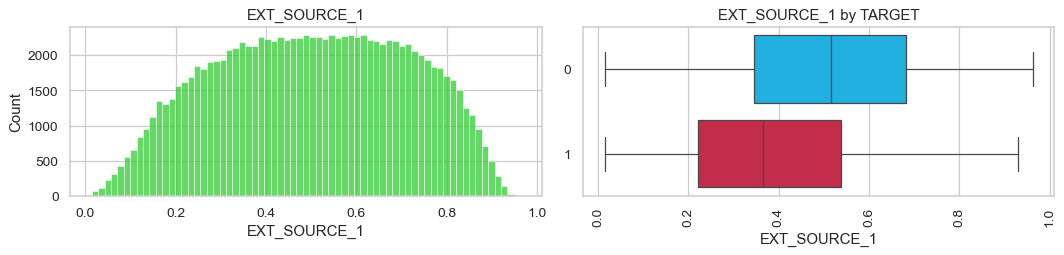

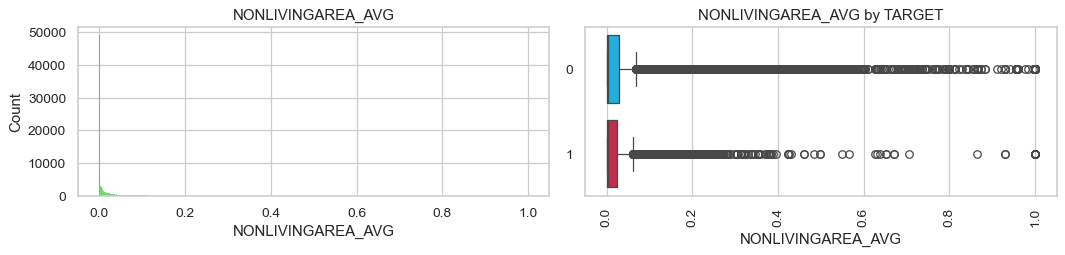

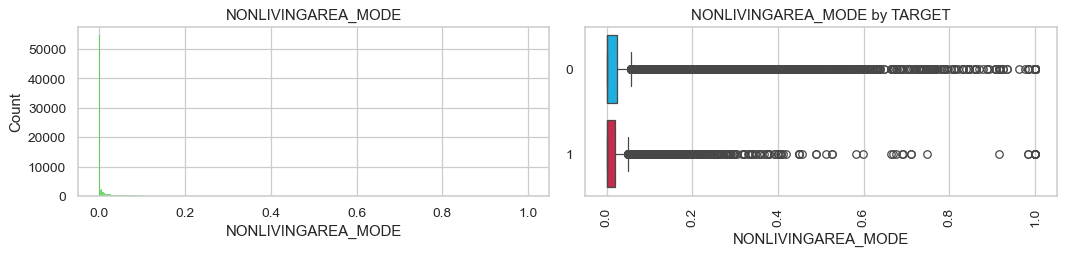

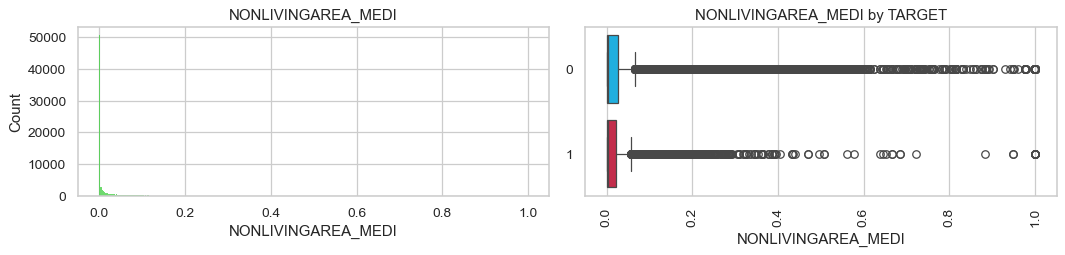

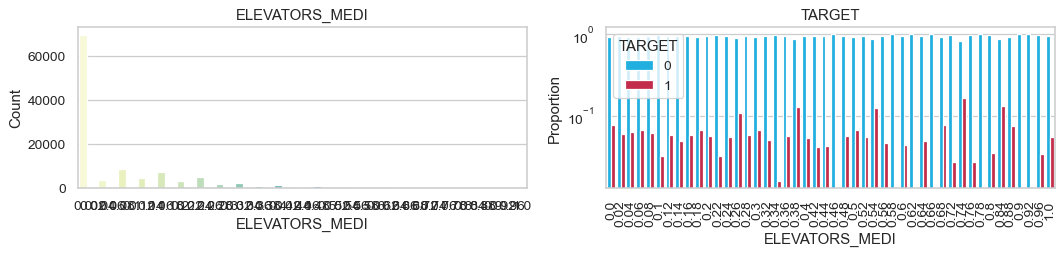

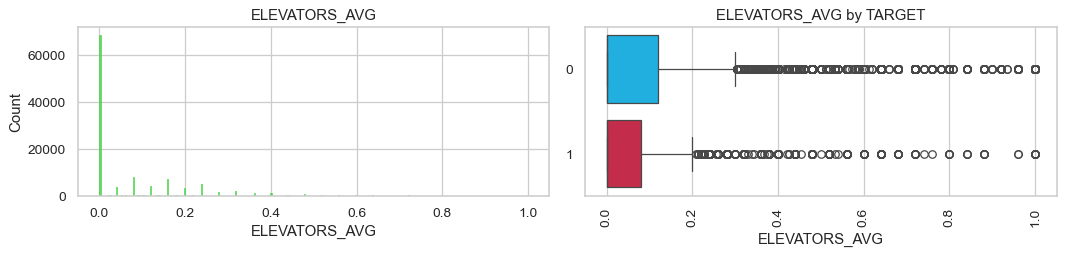

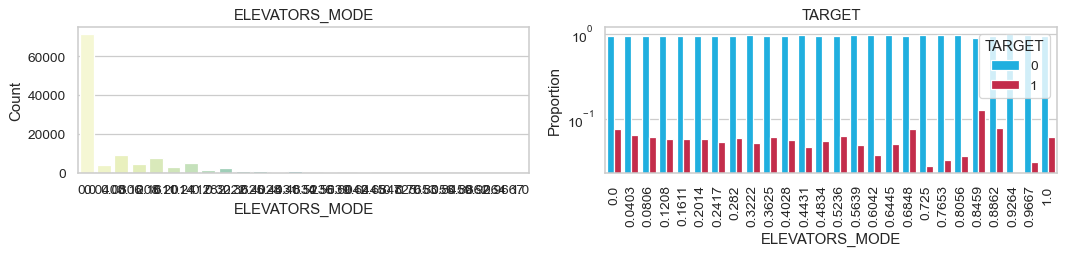

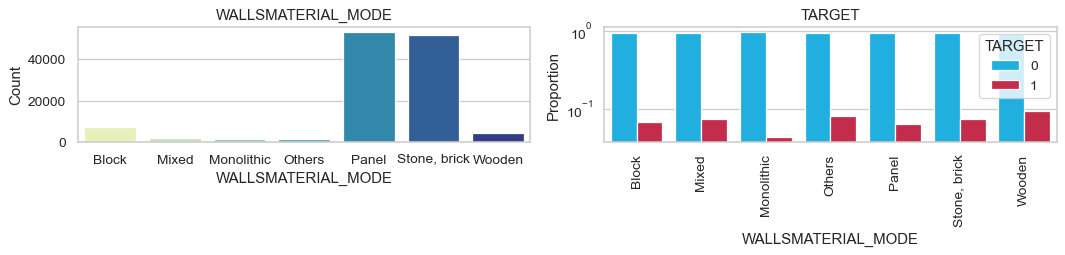

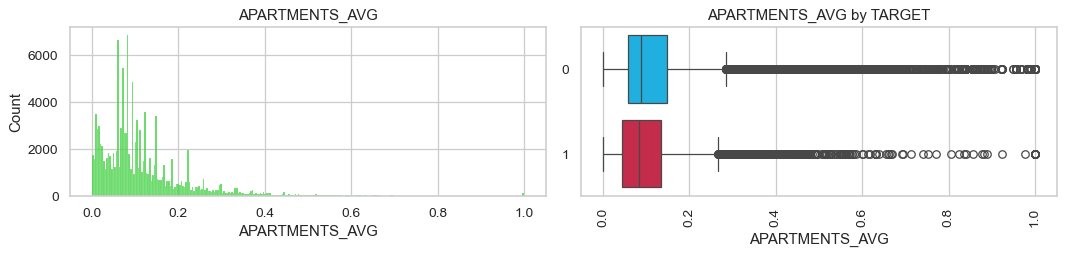

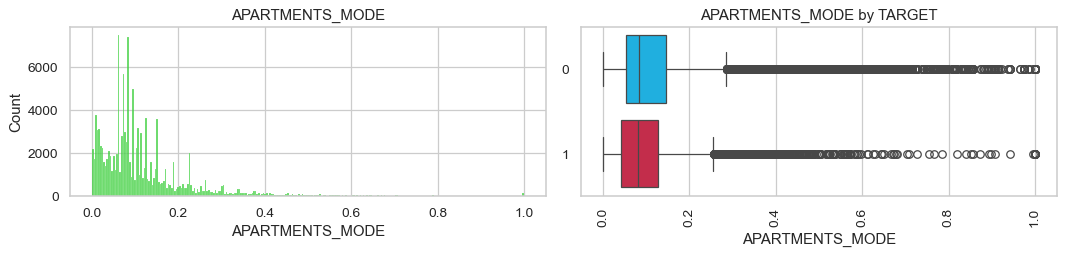

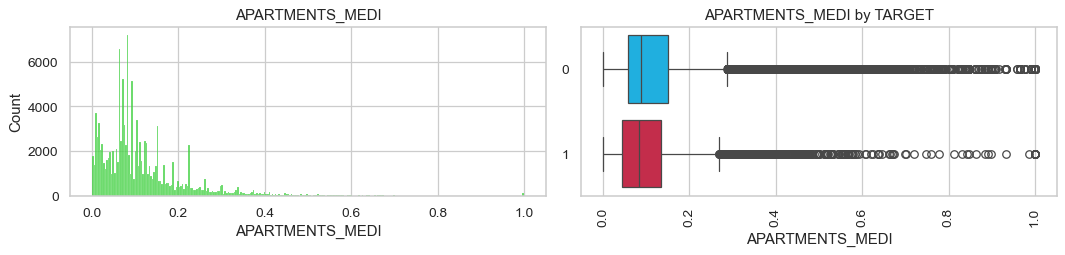

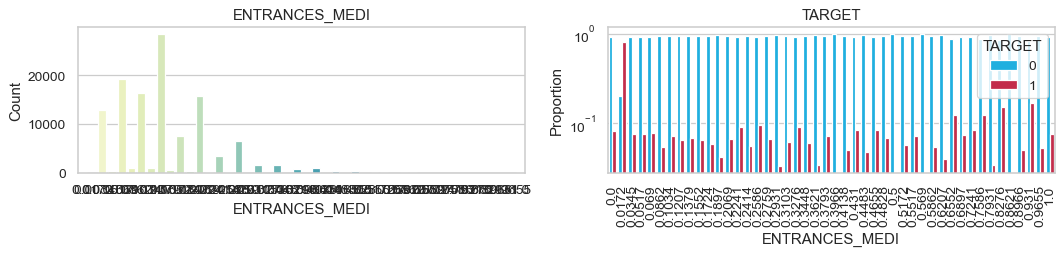

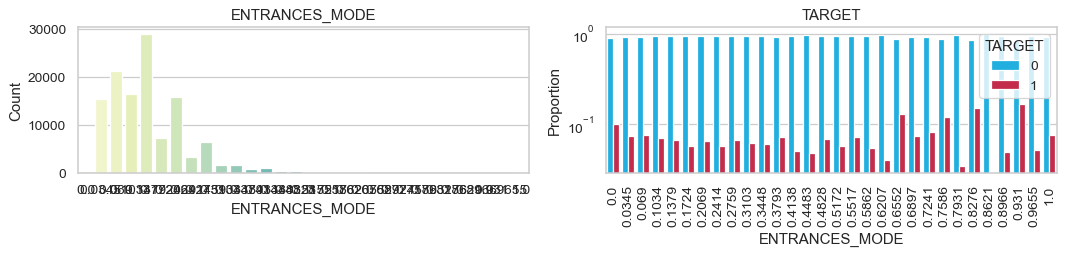

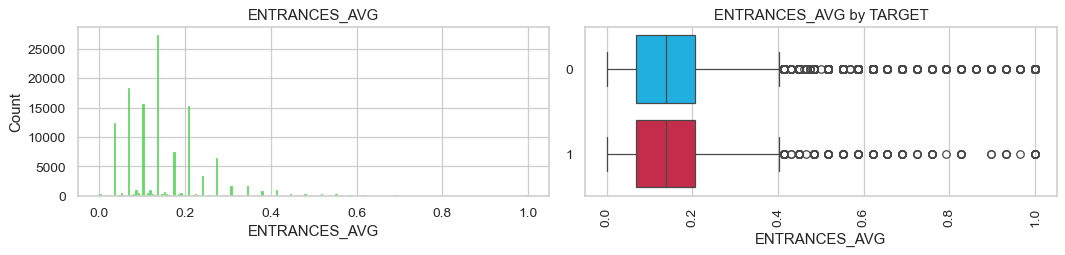

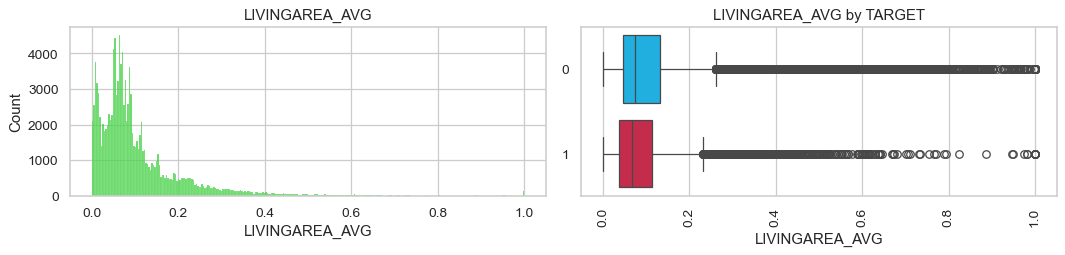

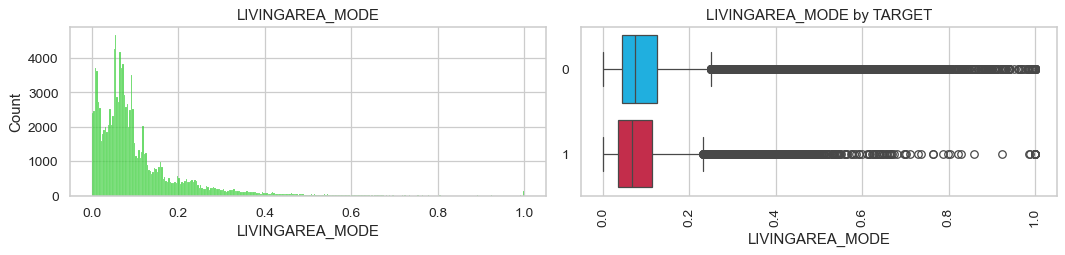

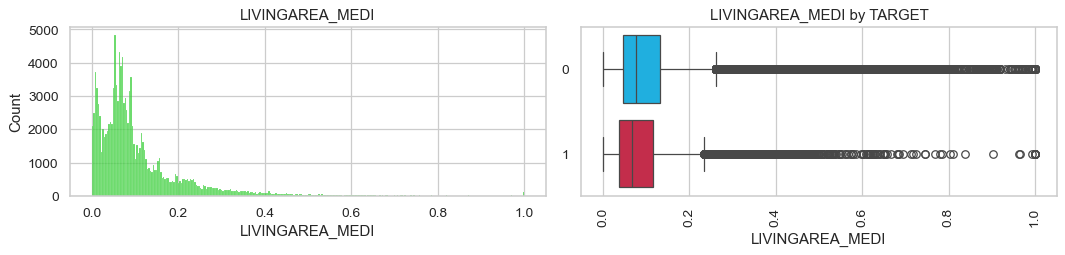

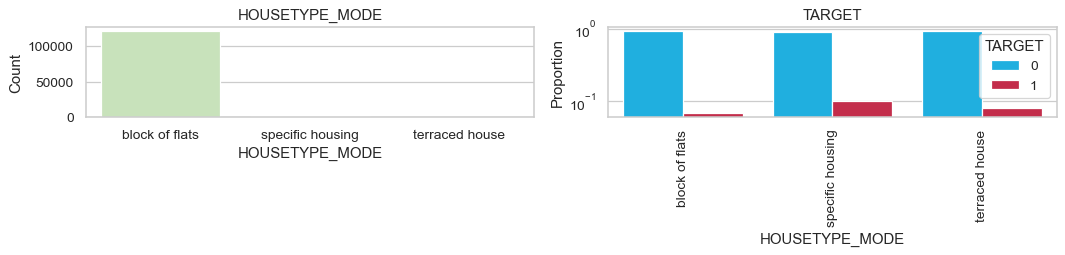

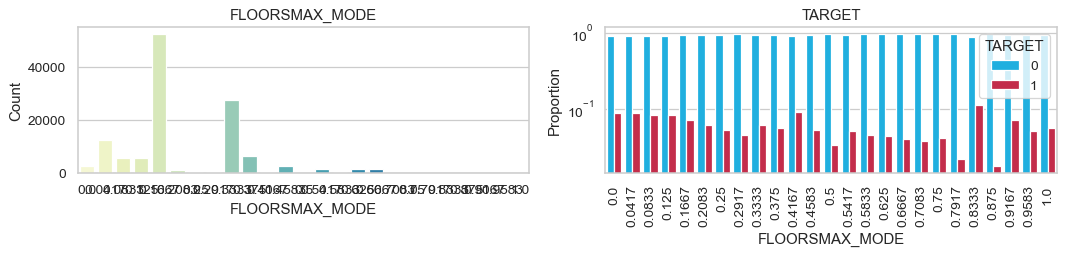

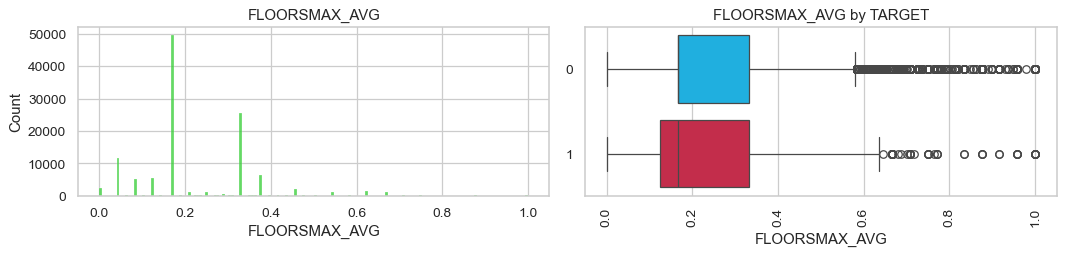

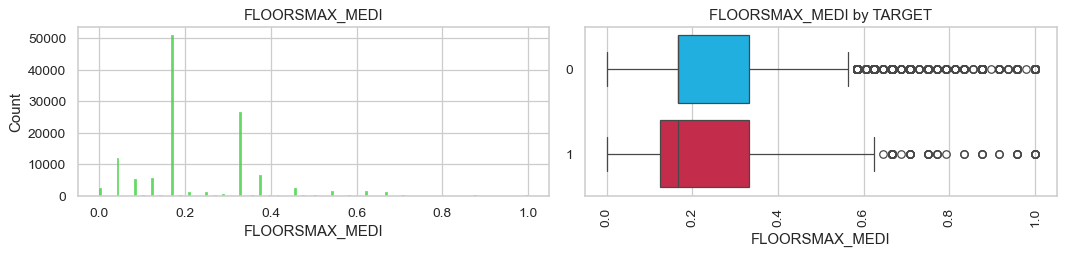

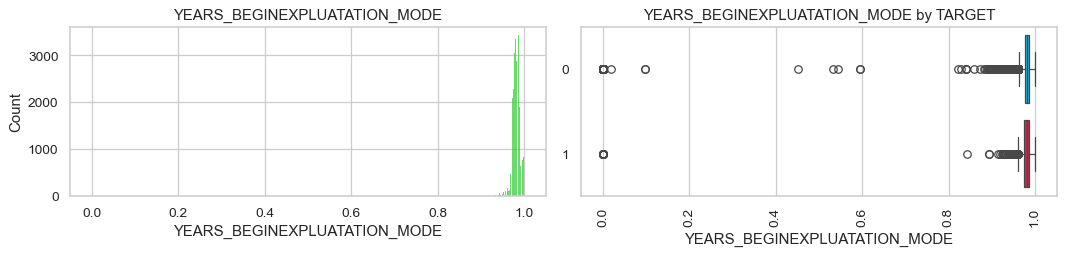

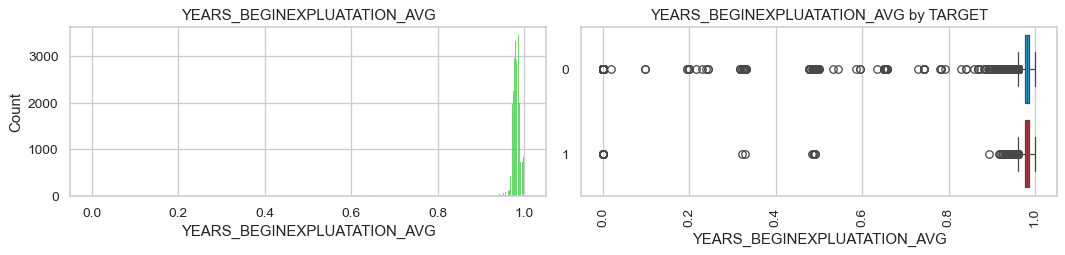

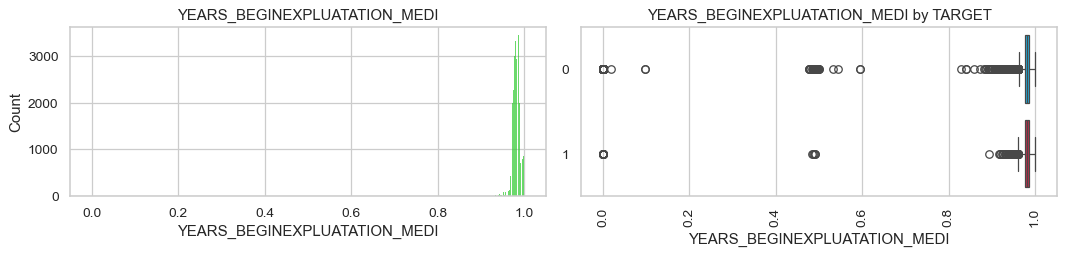

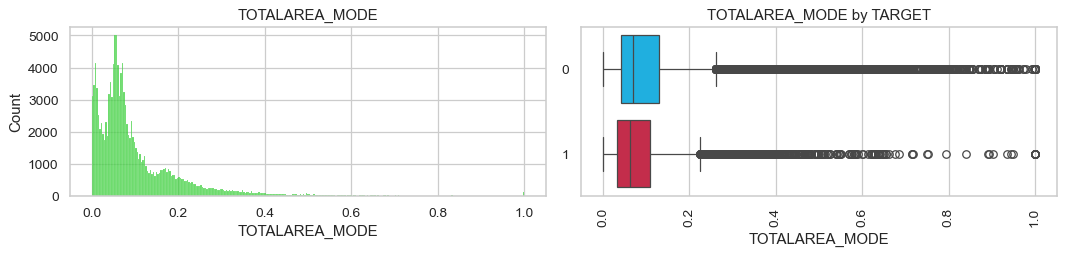

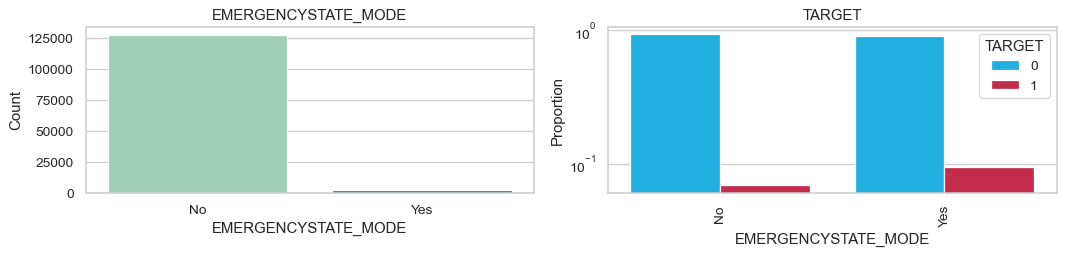

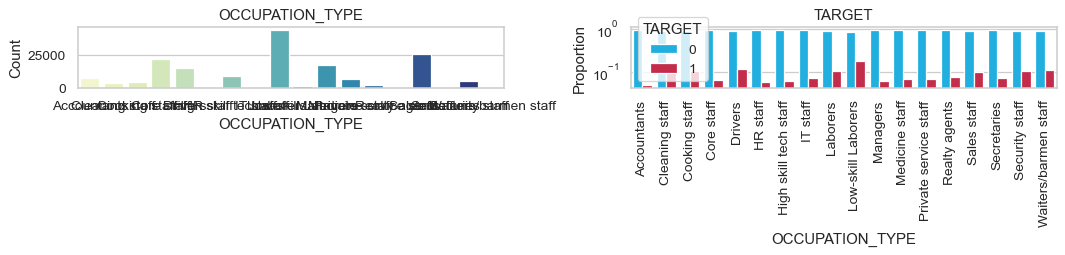

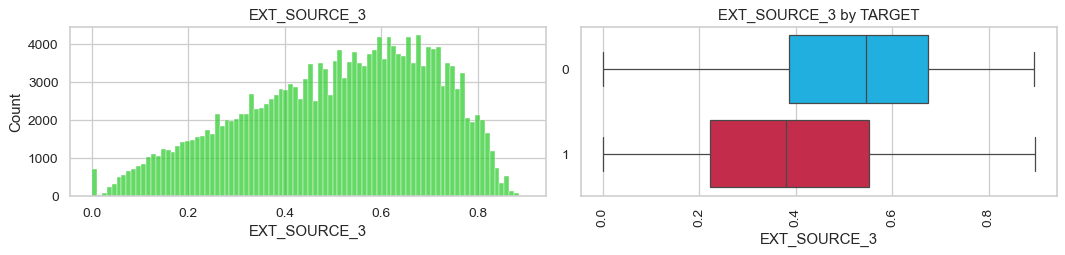

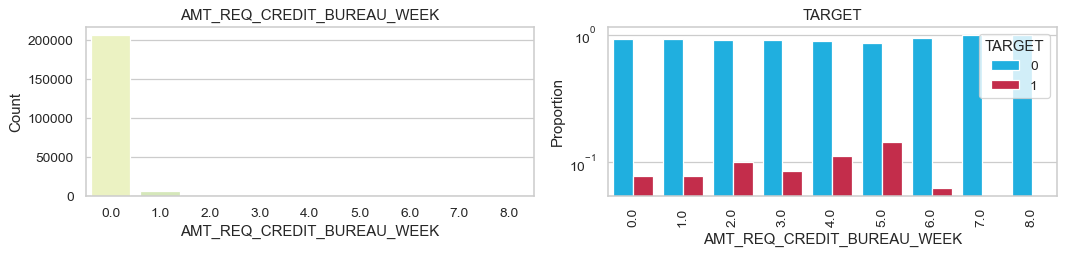

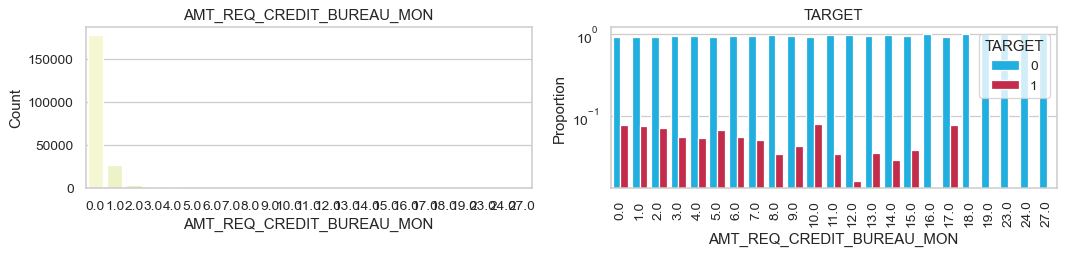

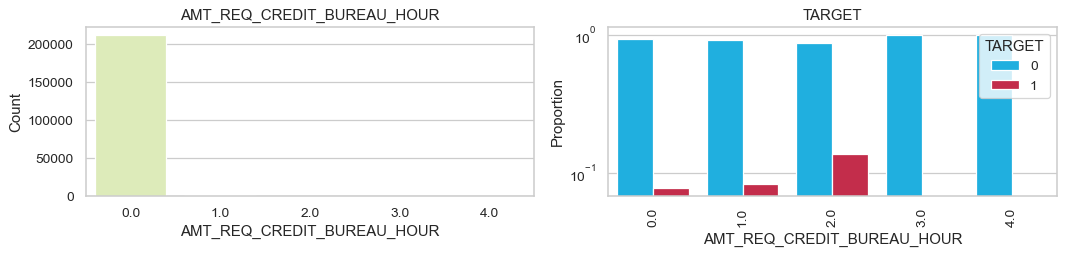

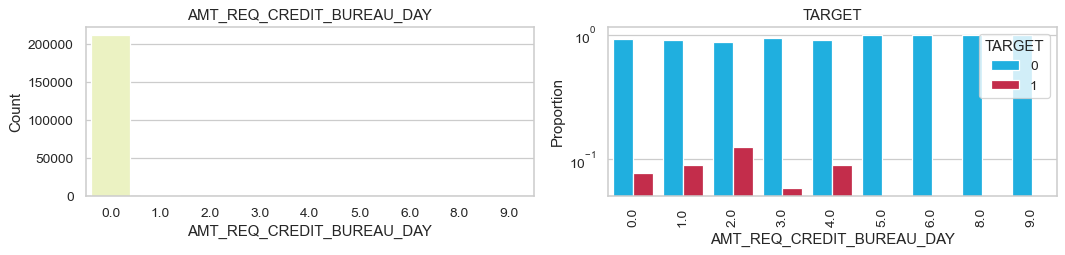

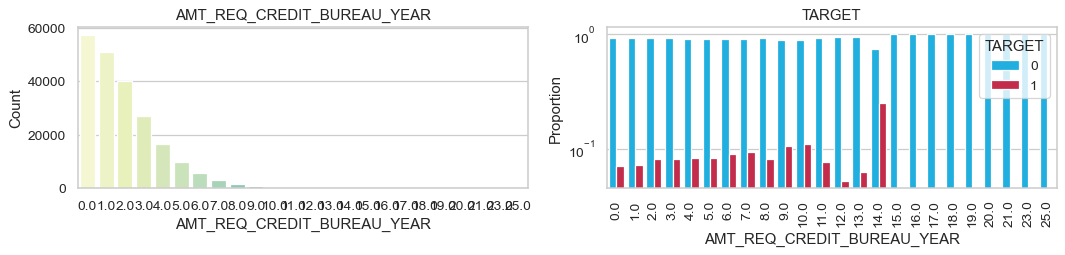

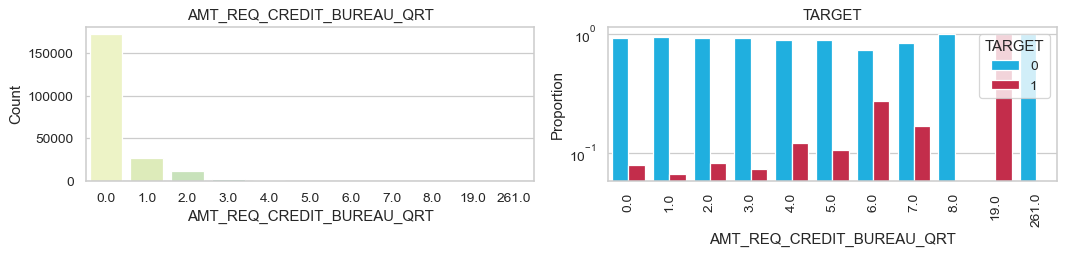

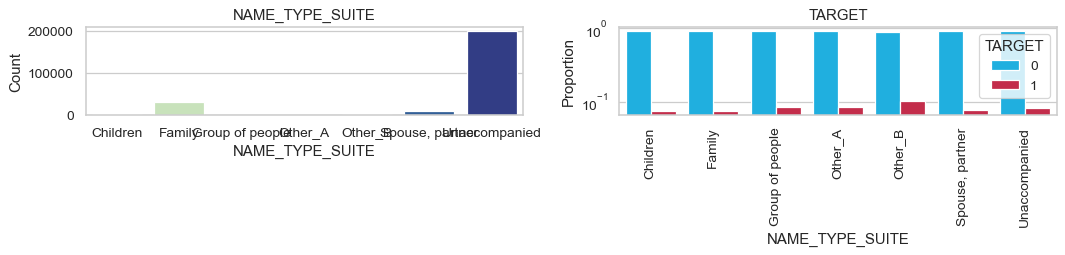

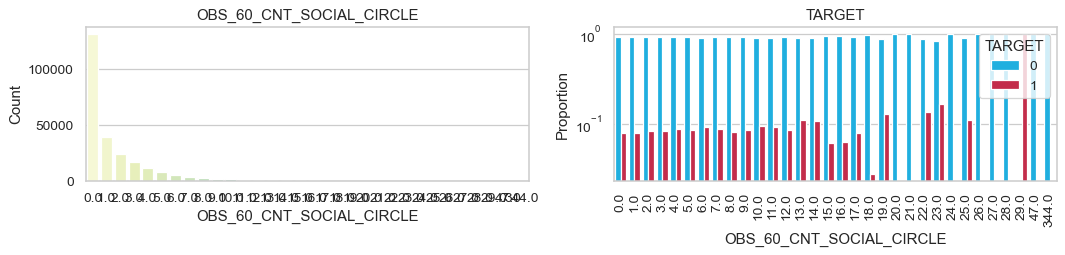

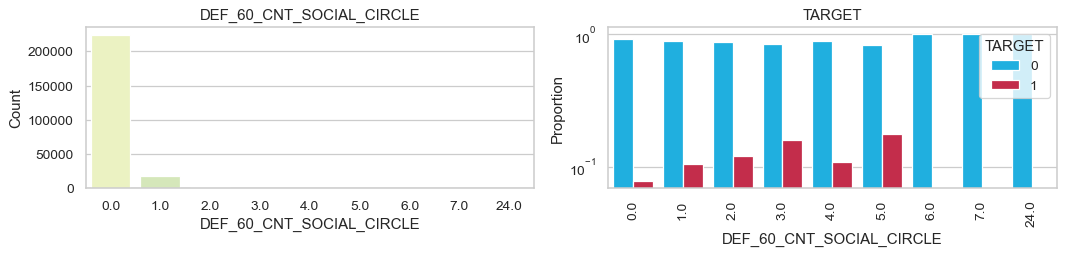

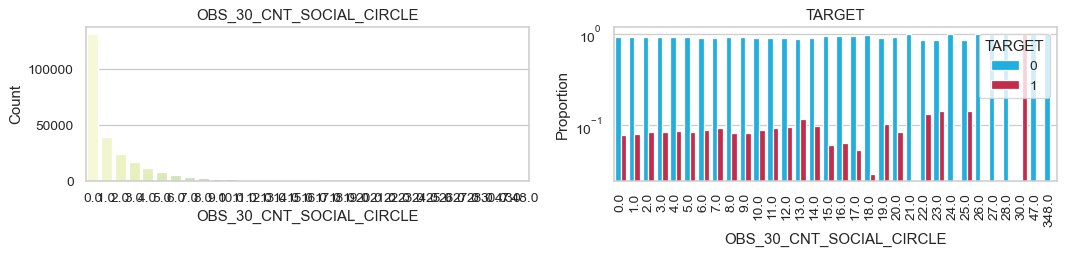

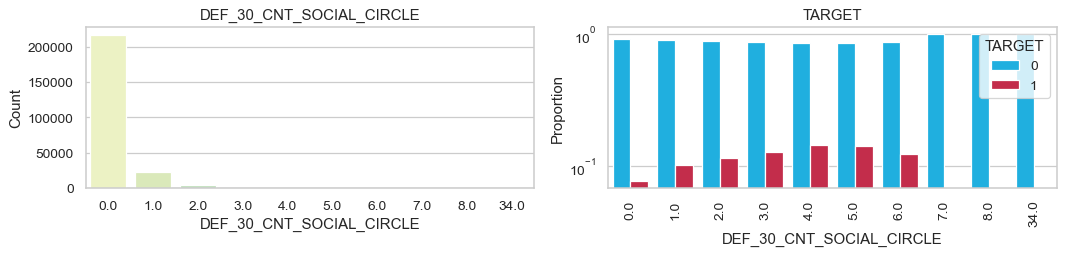

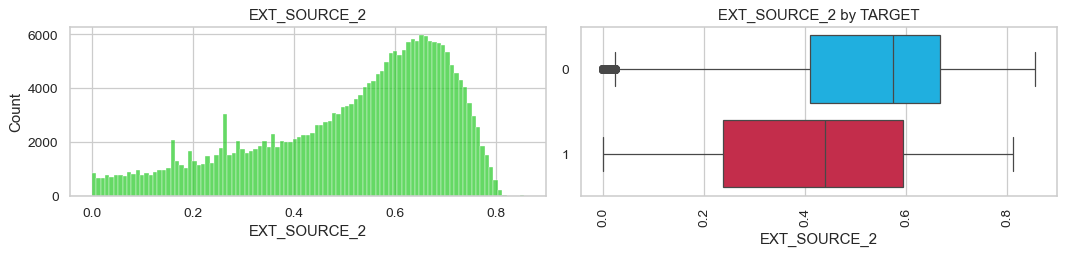

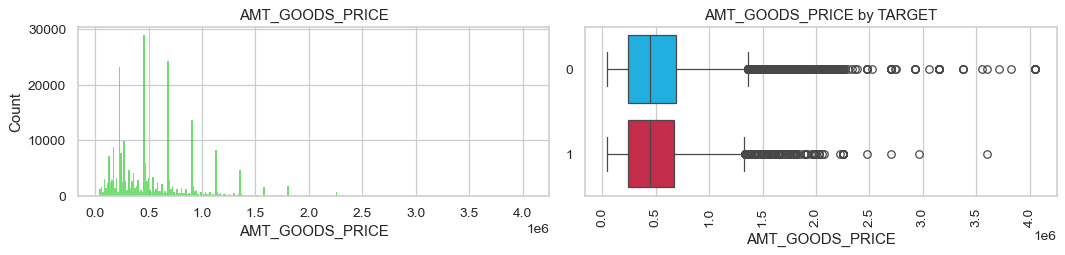

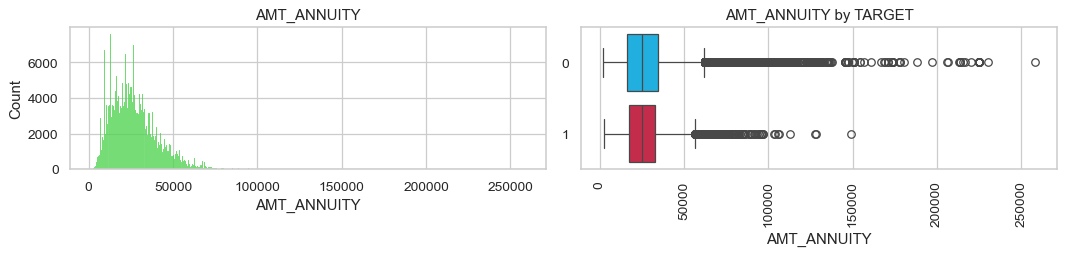

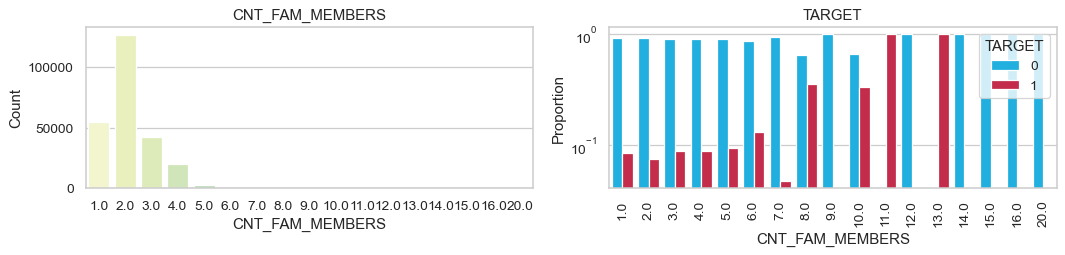

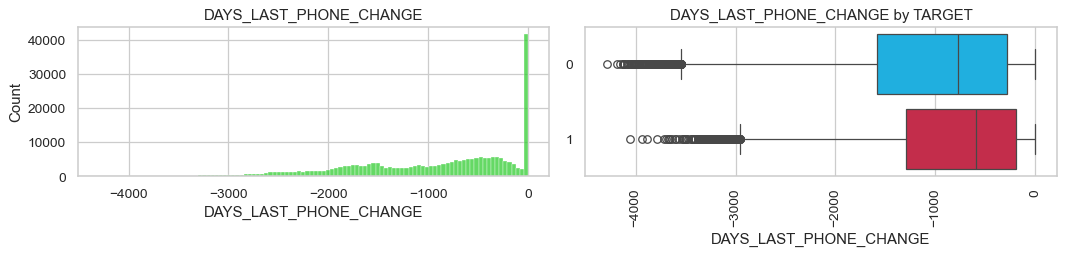

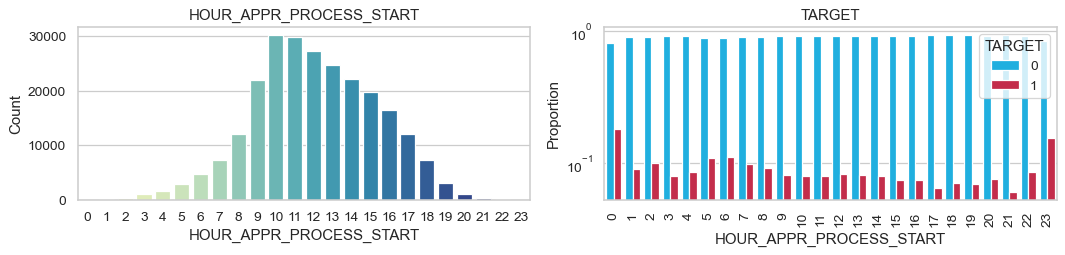

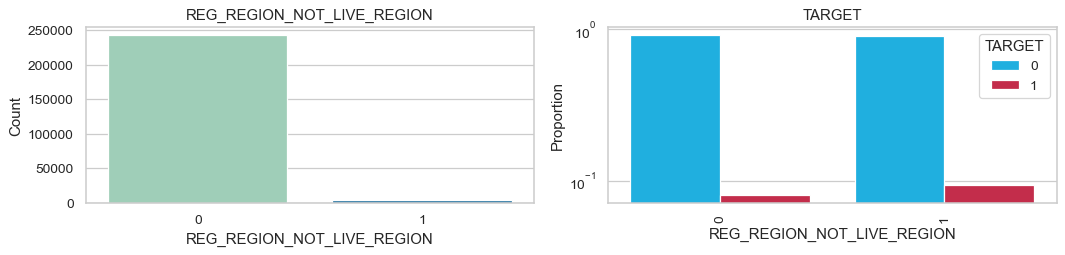

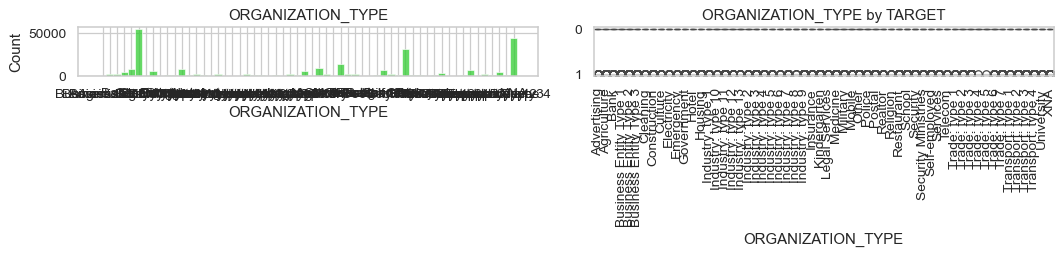

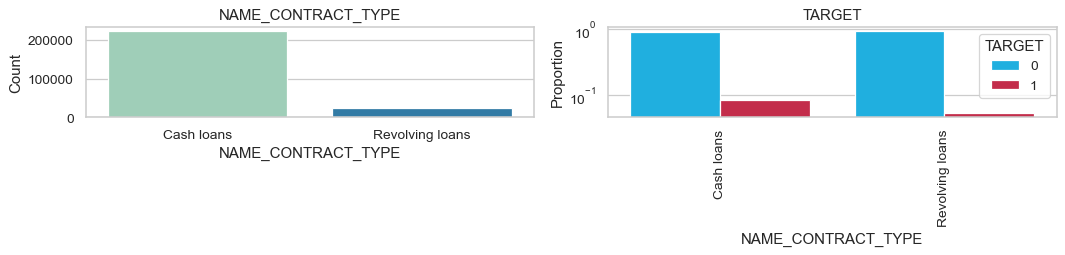

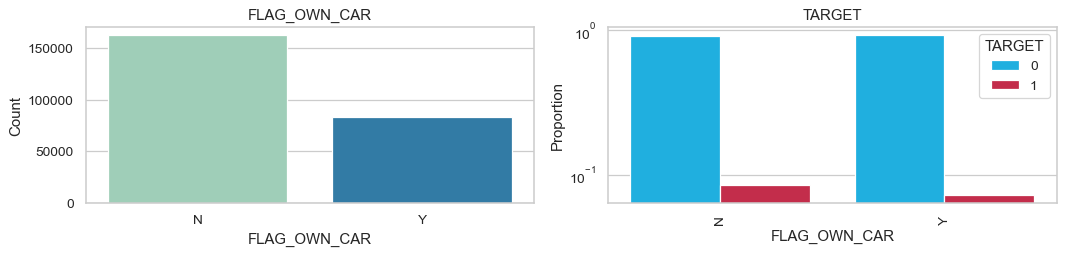

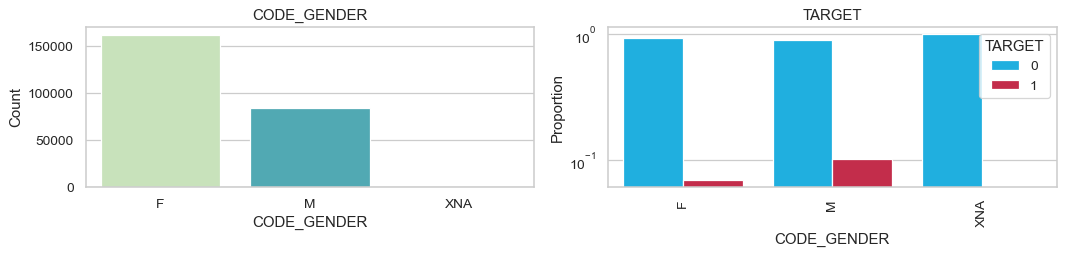

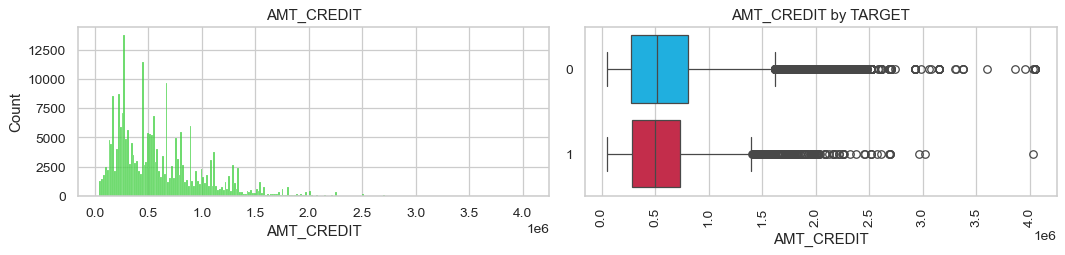

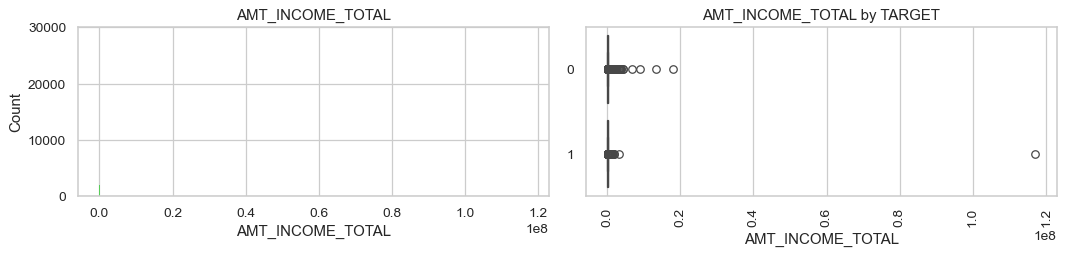

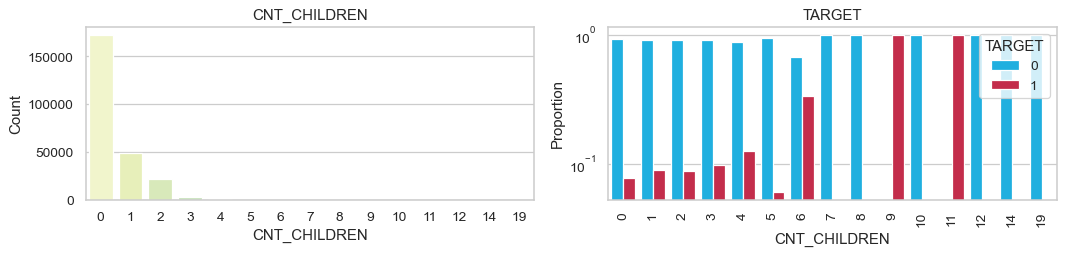

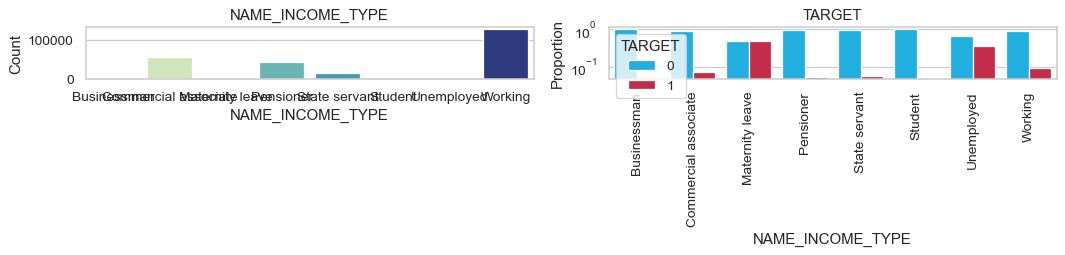

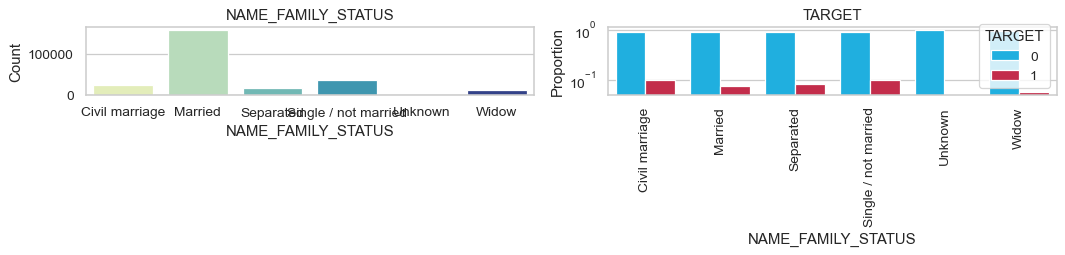

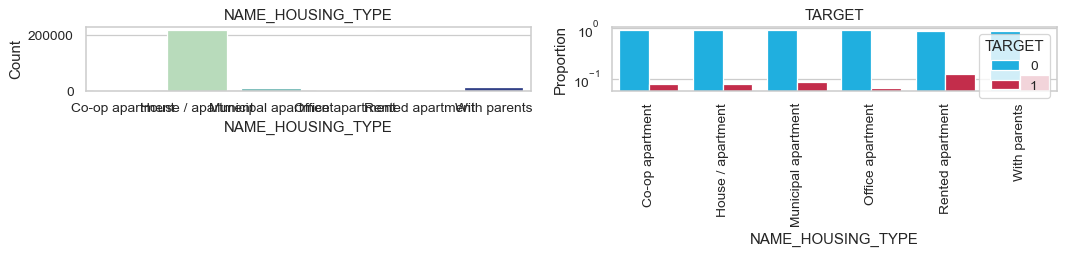

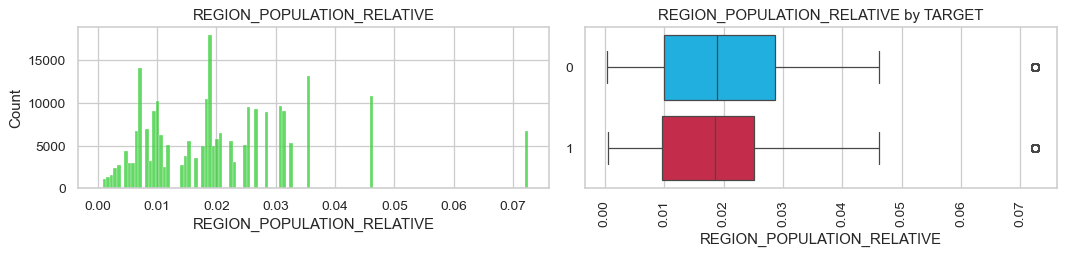

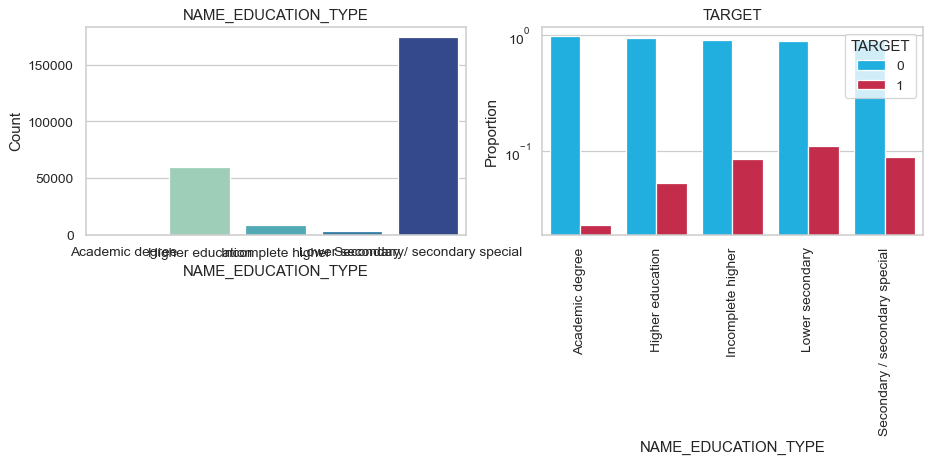

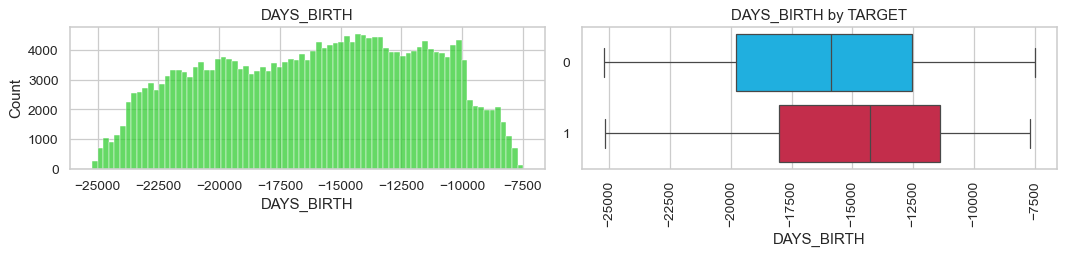

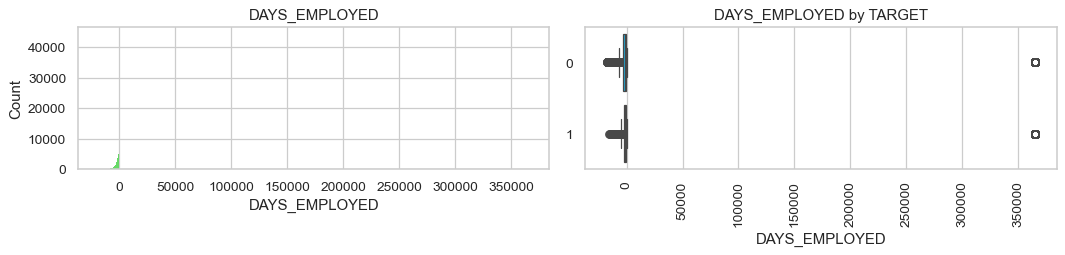

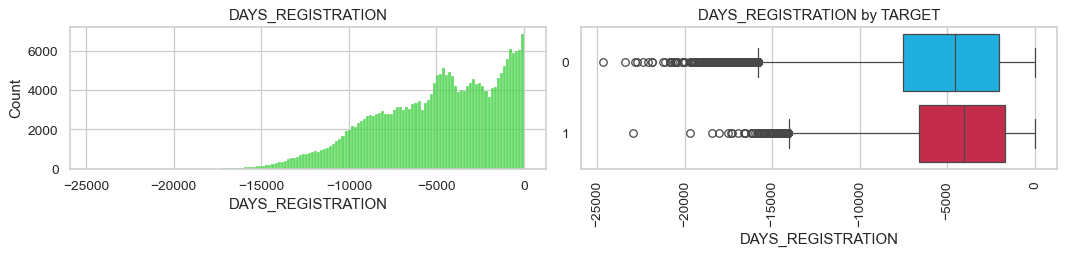

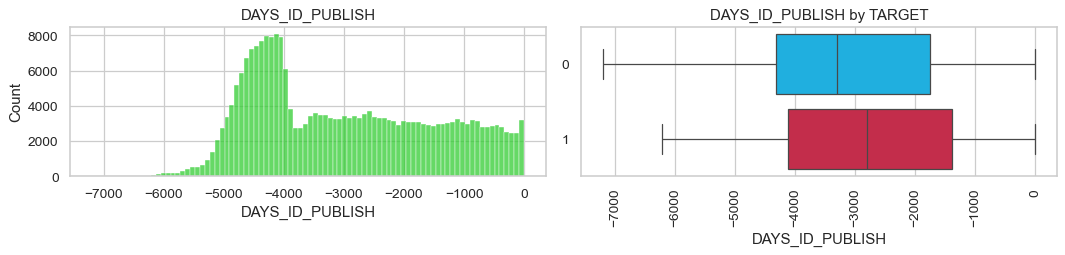

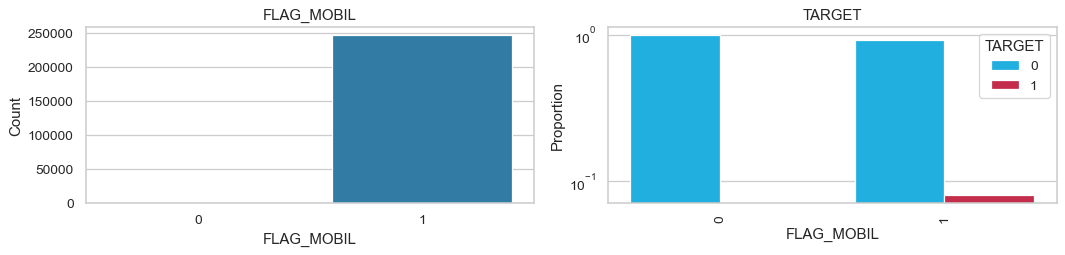

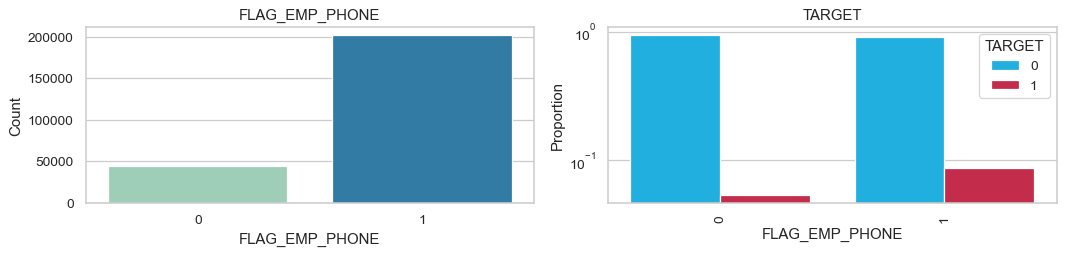

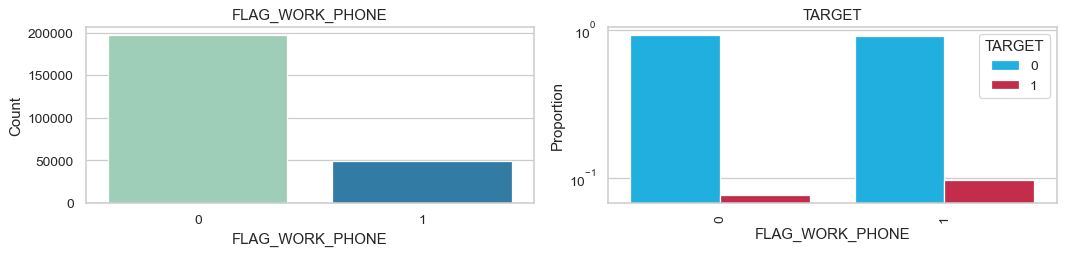

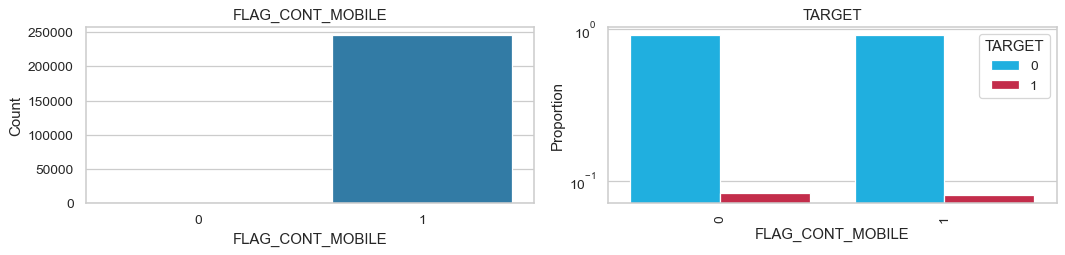

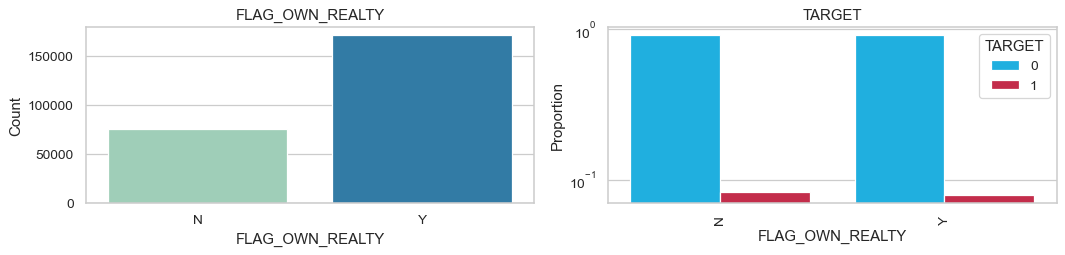

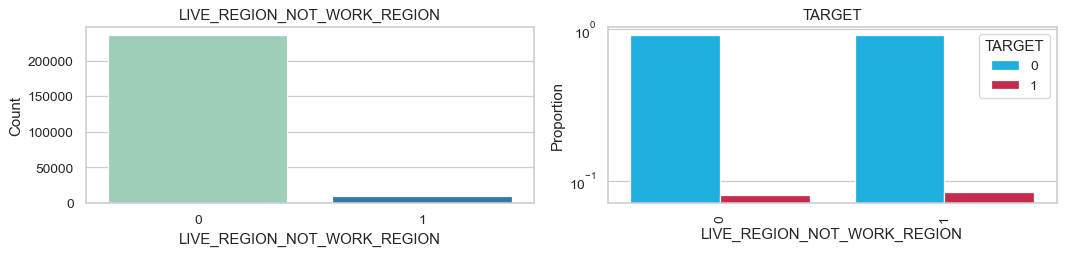

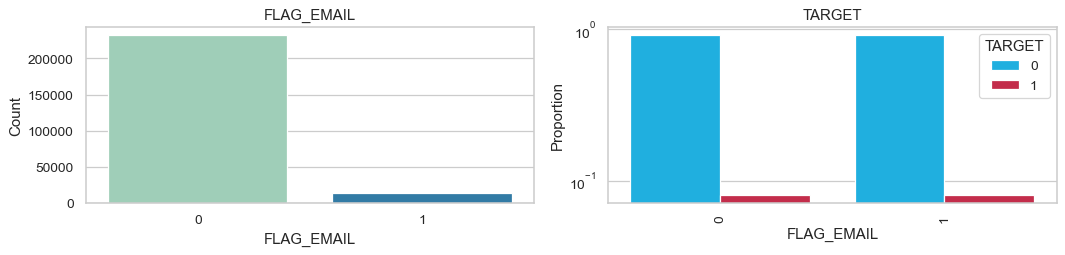

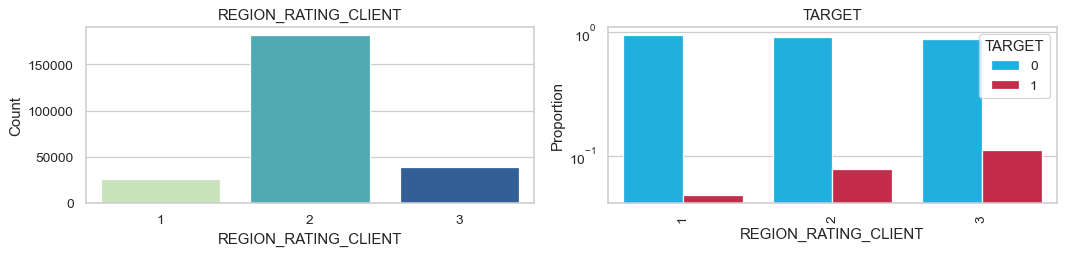

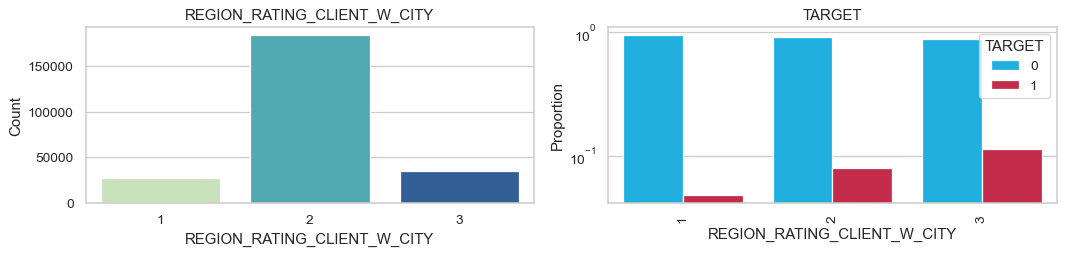

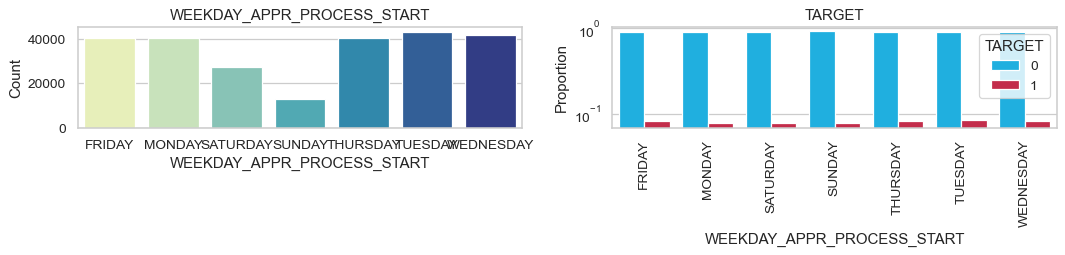

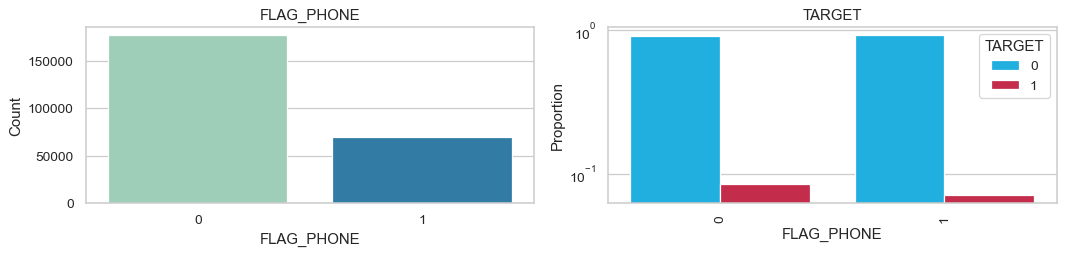

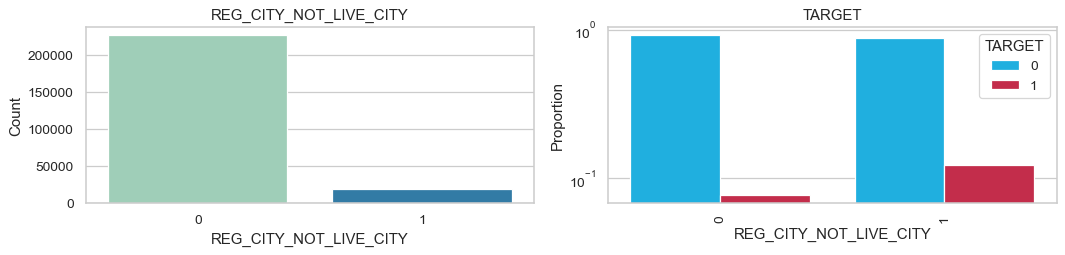

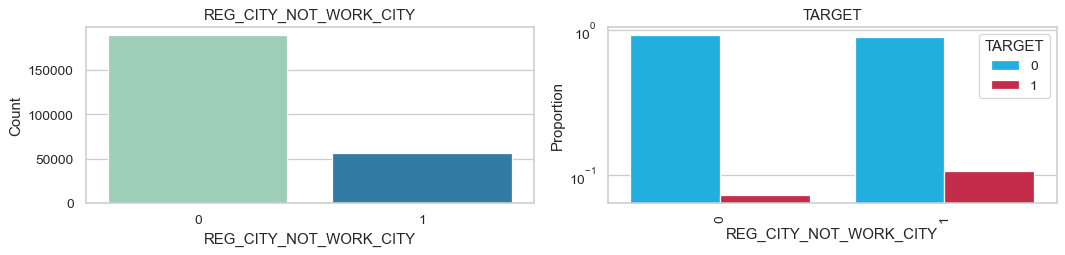

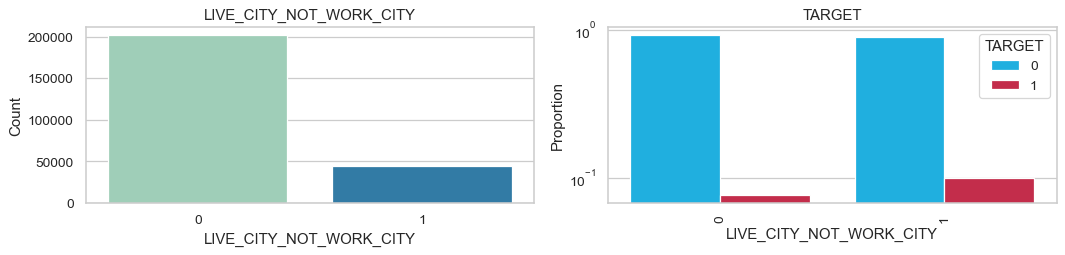

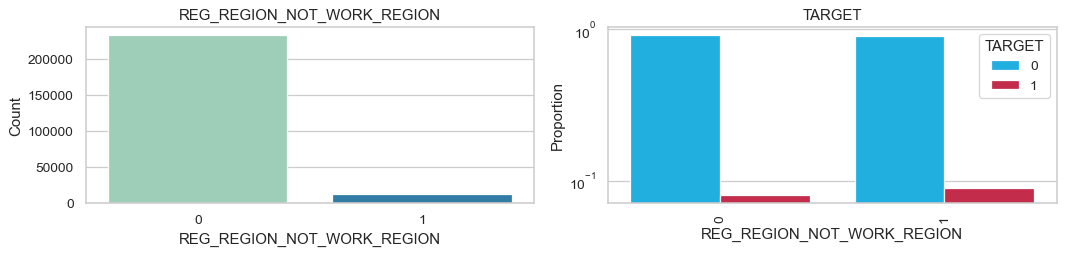

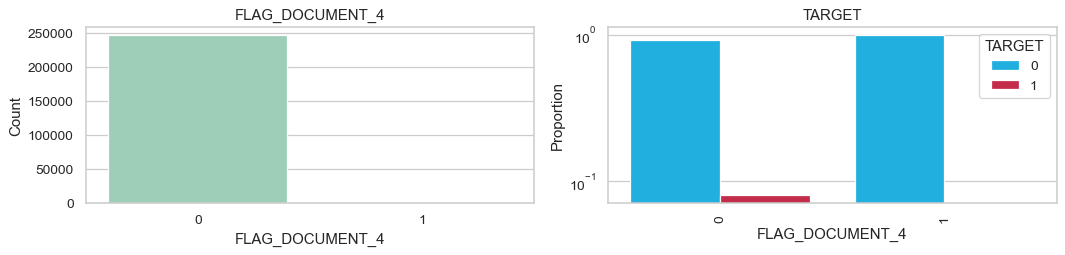

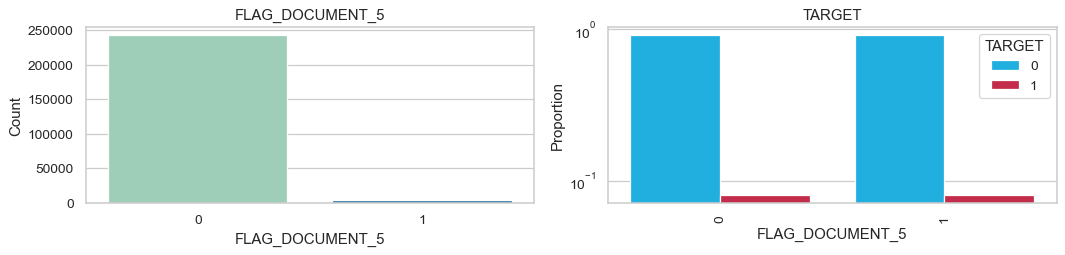

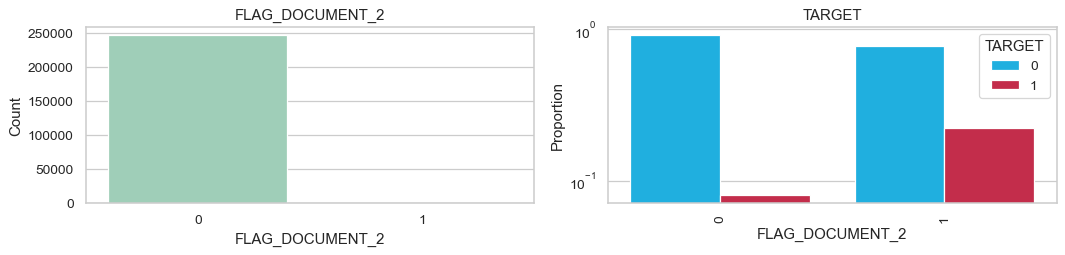

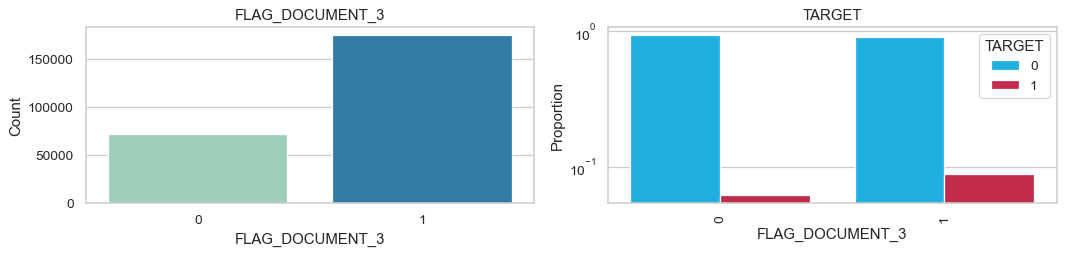

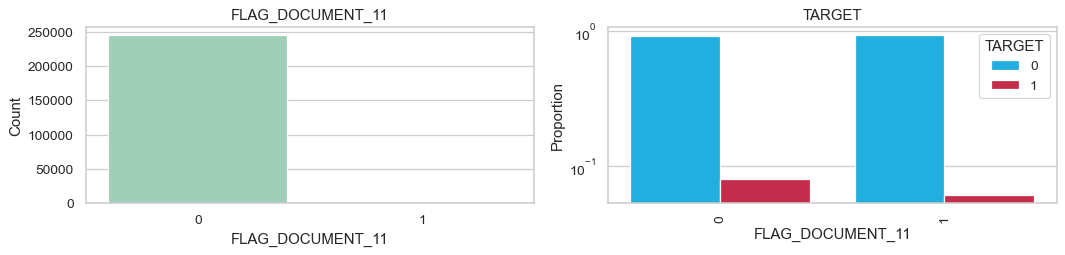

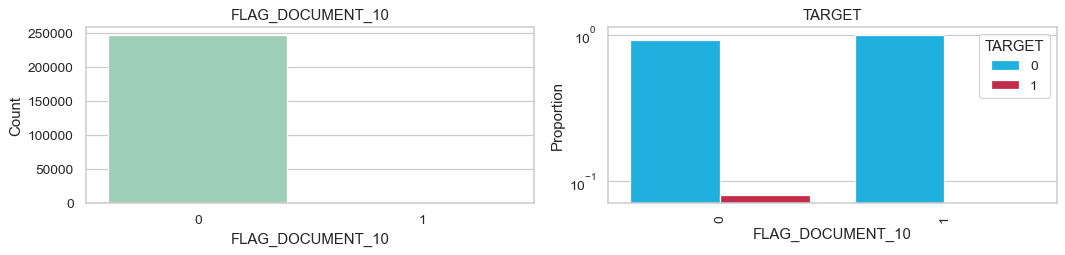

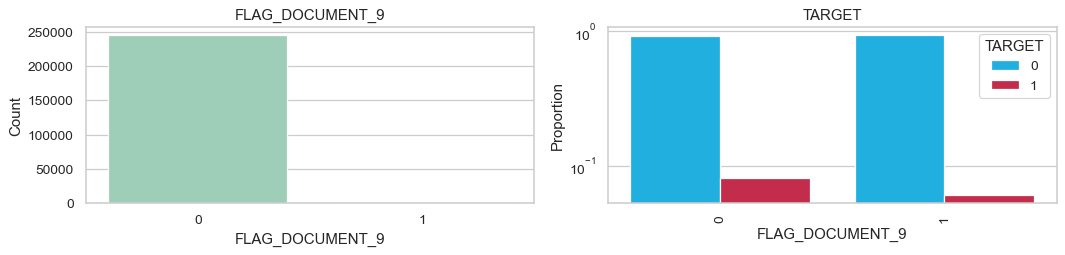

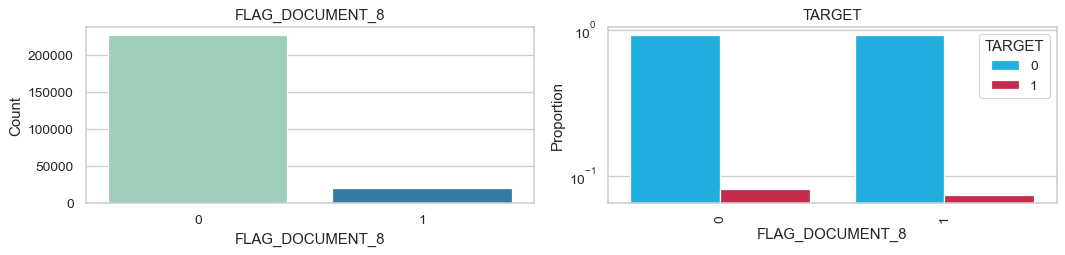

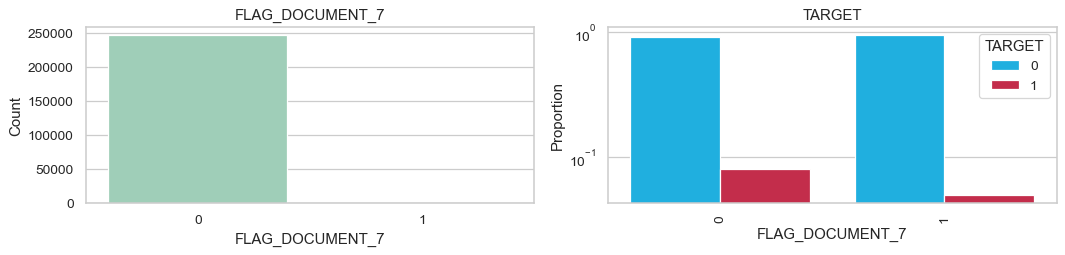

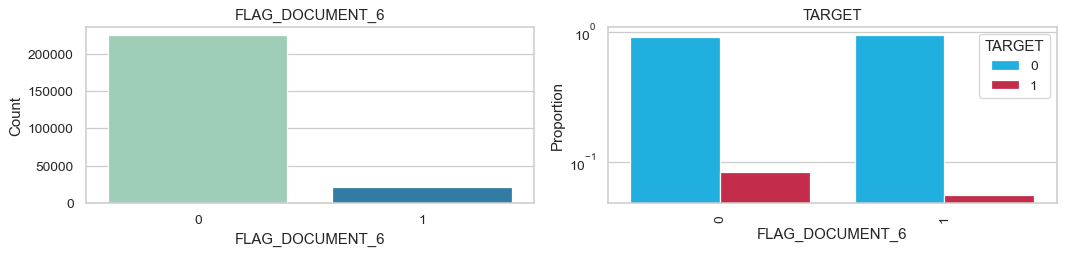

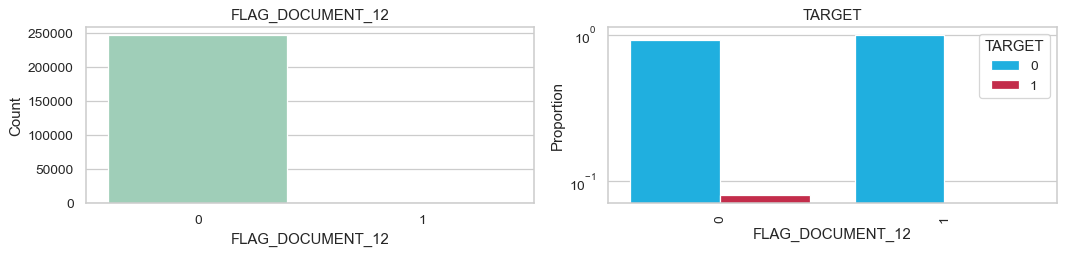

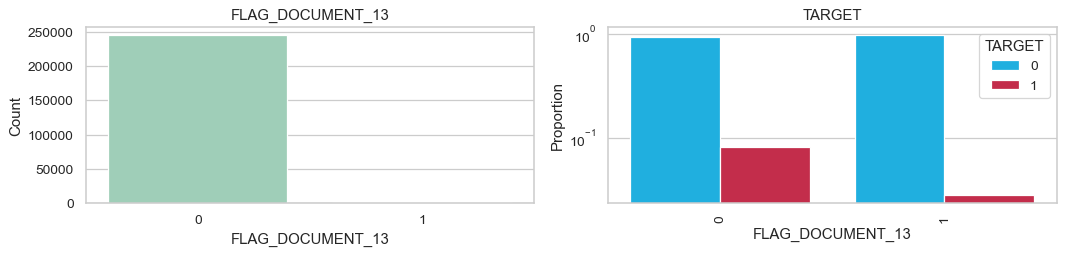

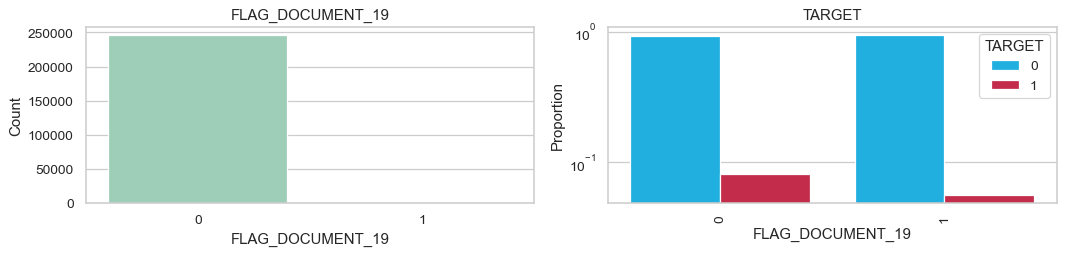

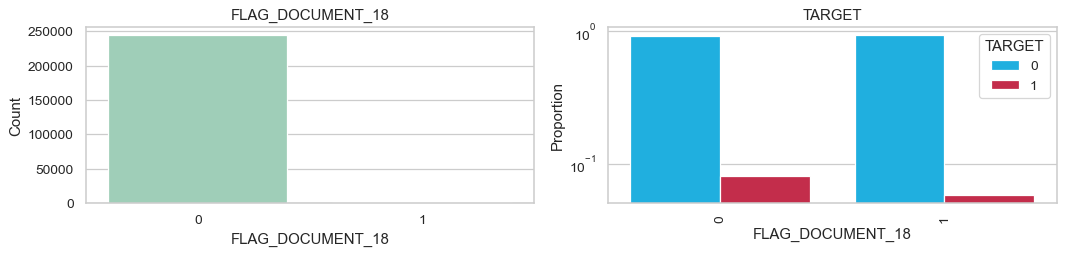

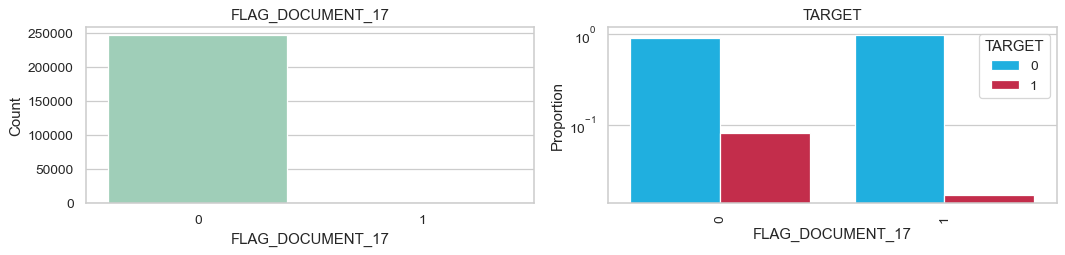

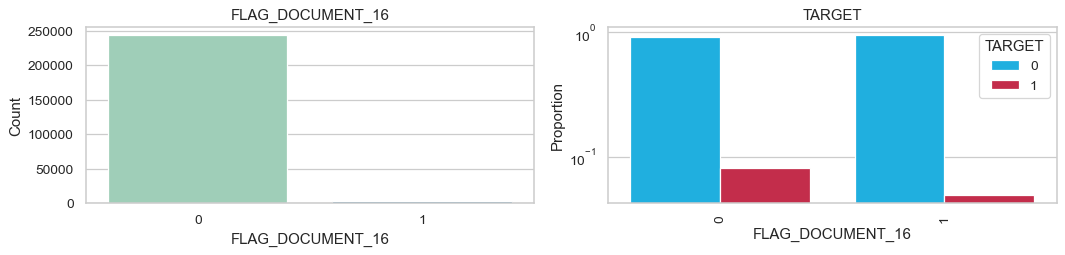

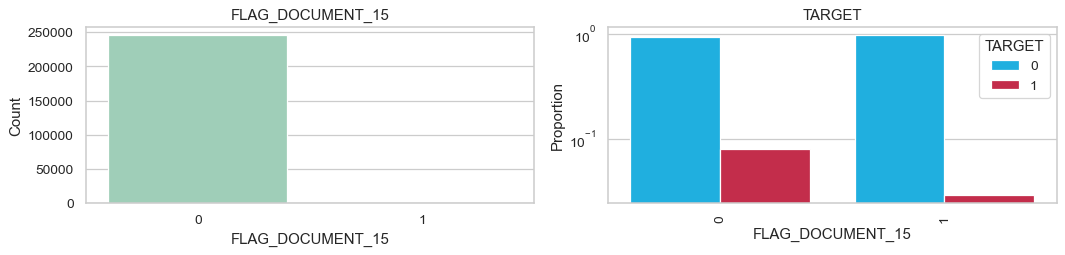

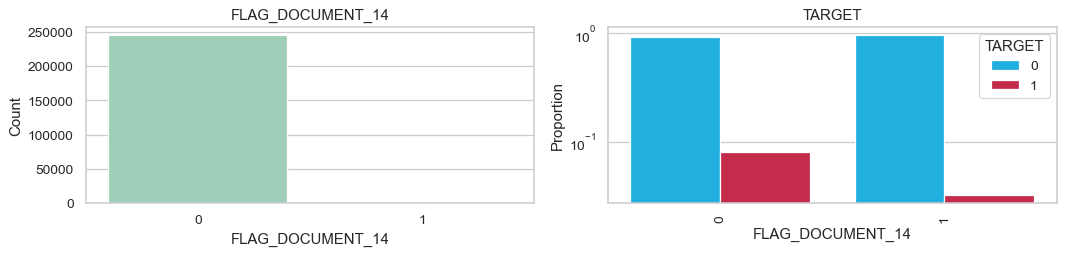

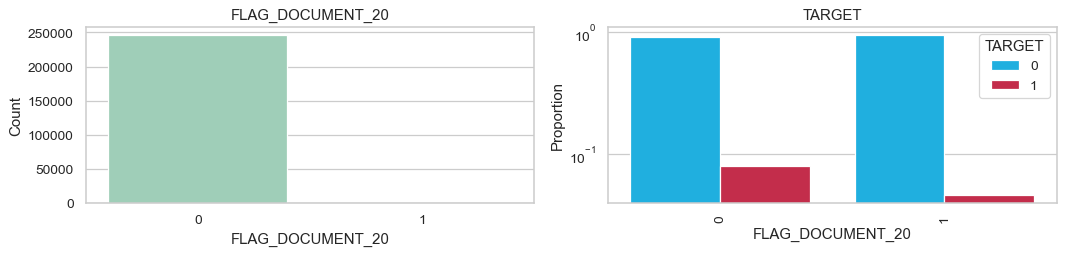

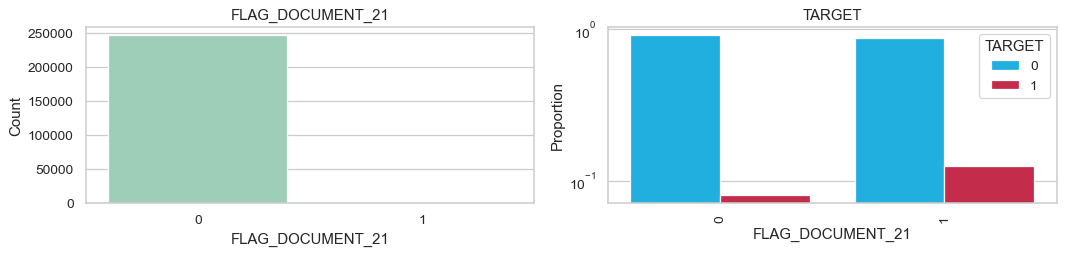

In [18]:
warnings.filterwarnings('ignore')
for i in list(df_loan_train.columns):
    if i in df_loan_num:
        f_aux.double_plot(df_loan_train, col_name=i, is_cont=True, target='TARGET')
    elif  ((i in df_loan_bool) | (i in df_loan_cat)) & (i!='TARGET'):
        f_aux.double_plot(df_loan_train, col_name=i, is_cont=False, target='TARGET')

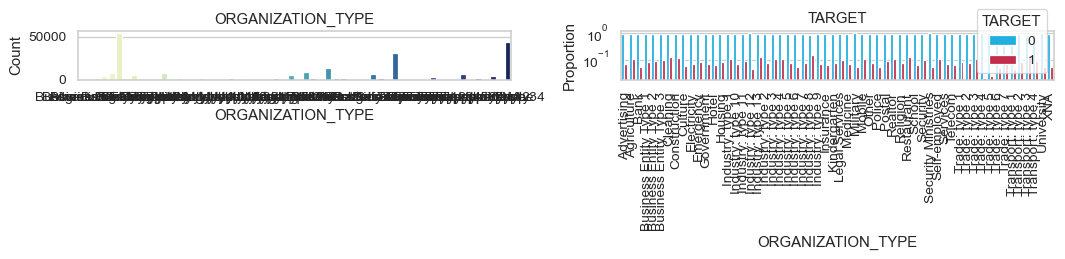

In [19]:
df_loan_train['ORGANIZATION_TYPE'] = df_loan_train['ORGANIZATION_TYPE'].astype('category')

f_aux.double_plot(df_loan_train, col_name='ORGANIZATION_TYPE', is_cont=False, target='TARGET')

### Análisis del gráfico

Cuando observamos las variables representadas visualmente, se dejan ver algunos detalles a tener en cuenta. Como el desbalanceo de la variable objetivo que ya había mencionado con anterioridad, o la cantidad de valores nulos de algunas variables que posteriormente transformaremos. Vamos a comentar el comportamiento de algunas variables en relación a nuestra variable objetivo TARGET.

1. Los clientes que tienen coches más antiguos se suelen retrasar en el pago del préstamo.
   
2. La dificultad en el pago del préstamo parece aumentar en los clientes con un score más bajo según la variable EXT_SOURCE_1, EXT_SOURCE_2 Y EXT_SOURCE_3 correspondiente a un score normalizado de una fuente de datos externa.

3. Los clientes con materiales de madera en las paredes de sus viviendas son los más propensos a retrasarse en el pago del préstamo.

4. Los clientes que tienen puestos de trabajo menos cualificados (low-skill laborers, drivers, waiters) presentan mayor probabilidad de retrasarse en el pago del préstamo.

5. Conforme aumenta el número de consultas de crédito antes de la solicitud del préstamo (AMT_REQ_CREDIT_BUREAU), más aumenta la probabilidad de que se retrase en la devolución del mismo.

6. Cuanto mayor es el tamaño de la familia del cliente más probabilidad en que se retrase en alguno de los pagos del préstamo.

7. Se puede observar que si el cliente cambió de teléfono móvil (DAYS_LAST_PHONE_CHANGE) hace relativamente poco tiempo, aumenta la probabilidad de que pueda tener dificultades en el pago del préstamo.

8. Los hombres son más propensos que las mujeres a tener dificultades en el pago del préstamo (CODE_GENDER).

9. Cuanto mayor sea la cantidad de hijos que tiene el cliente, mayor será la dificultad de pago que tendrá (CNT_CHILDREN).

10. Los clientes de baja por maternidad o desempleados son más propensos a tener dificultad en el pago del préstamo (NAME_INCOME_TYPE).

11. Los clientes con una mayor educación son menos propensos a tener dificultades a la hora de devolver el préstamo (NAME_EDUCATION_TYPE).

12. Parece que cuanto más jóven es el cliente (DAYS_BIRTH) tendrá más dificultades para el pago del préstamo.

13. Los clientes que cambiaron su documento de ID poco antes de solicitar el préstamo (DAYS_ID_PUBLISH), además de si cambió su registro (DAYS_REGISTRATION) poco antes de la solicitud del préstamo, tendrá más dificultades para el pago del mismo.

14. Cuanto mayor es el score de la región donde vive el cliente (REGION_RATING_CLIENT), mayor es la probabilidad de que tenga dificultades para el pago del préstamo.

15. Los clientes que dieron el FLAG_DOCUMENT_2 tienen mayor probabilidad de tener dificultades en el pago del préstamo.

## Tratamiento de variables continuas
### Tratamiento de outliers

In [16]:
f_aux.get_deviation_of_mean_perc(df_loan_train, list_var_continuous, target='TARGET', multiplier=3)

0.0       1.0                      variable  sum_outlier_values  \
0   0.950260  0.049740                COMMONAREA_AVG                1347   
1   0.947985  0.052015               COMMONAREA_MEDI                1365   
2   0.945966  0.054034               COMMONAREA_MODE                1351   
3   0.931699  0.068301       NONLIVINGAPARTMENTS_AVG                 571   
4   0.932384  0.067616      NONLIVINGAPARTMENTS_MEDI                 562   
5   0.928972  0.071028      NONLIVINGAPARTMENTS_MODE                 535   
6   0.948483  0.051517         LIVINGAPARTMENTS_MEDI                1417   
7   0.950820  0.049180          LIVINGAPARTMENTS_AVG                1403   
8   0.949093  0.050907         LIVINGAPARTMENTS_MODE                1434   
9   0.963542  0.036458                FLOORSMIN_MODE                 384   
10  0.962105  0.037895                 FLOORSMIN_AVG                 475   
11  0.963801  0.036199                FLOORSMIN_MEDI                 442   
12  0.930256  0.069744              YEARS_BUILD_MODE                 975   
13  0.930113  0.069887              YEARS_BUILD_MEDI                 973   
14  0.929314  0.070686               YEARS_BUILD_AVG                 962   
15  0.918216  0.081784                   OWN_CAR_AGE                2690   
16  0.939745  0.060255                 LANDAREA_MEDI                1726   
17  0.939554  0.060446                  LANDAREA_AVG                1704   
18  0.938444  0.061556                 LANDAREA_MODE                1722   
19  0.949788  0.050212             BASEMENTAREA_MODE                1653   
20  0.950664  0.049336              BASEMENTAREA_AVG                1581   
21  0.951158  0.048842             BASEMENTAREA_MEDI                1597   
22  0.953101  0.046899             NONLIVINGAREA_AVG                1919   
23  0.952796  0.047204            NONLIVINGAREA_MODE                1949   
24  0.951988  0.048012            NONLIVINGAREA_MEDI                1937   
25  0.955838  0.044162                ELEVATORS_MEDI                1970   
26  0.956522  0.043478                 ELEVATORS_AVG                1978   
27  0.952240  0.047760                ELEVATORS_MODE                2701   
28  0.951477  0.048523                APARTMENTS_AVG                2370   
29  0.950908  0.049092               APARTMENTS_MODE                2424   
30  0.951432  0.048568               APARTMENTS_MEDI                2409   
31  0.939242  0.060758                ENTRANCES_MEDI                1794   
32  0.938949  0.061051                ENTRANCES_MODE                1769   
33  0.939989  0.060011                 ENTRANCES_AVG                1783   
34  0.949106  0.050894                LIVINGAREA_AVG                2574   
35  0.946647  0.053353               LIVINGAREA_MODE                2699   
36  0.949499  0.050501               LIVINGAREA_MEDI                2594   
37  0.958974  0.041026                FLOORSMAX_MODE                2145   
38  0.958451  0.041549                 FLOORSMAX_AVG                2118   
39  0.958070  0.041930                FLOORSMAX_MEDI                2218   
40  0.907473  0.092527  YEARS_BEGINEXPLUATATION_MODE                 562   
41  0.909250  0.090750   YEARS_BEGINEXPLUATATION_AVG                 573   
42  0.905204  0.094796  YEARS_BEGINEXPLUATATION_MEDI                 538   
43  0.958113  0.041887                TOTALAREA_MODE                2650   
44  0.922898  0.077102    AMT_REQ_CREDIT_BUREAU_WEEK                6874   
45  0.947908  0.052092     AMT_REQ_CREDIT_BUREAU_MON                2534   
46  0.915202  0.084798    AMT_REQ_CREDIT_BUREAU_HOUR                1309   
47  0.902766  0.097234     AMT_REQ_CREDIT_BUREAU_DAY                1193   
48  0.908956  0.091044    AMT_REQ_CREDIT_BUREAU_YEAR                2702   
49  0.916576  0.083424     AMT_REQ_CREDIT_BUREAU_QRT                1846   
50  0.912219  0.087781      OBS_60_CNT_SOCIAL_CIRCLE                4796   
51  0.870599  0.129401      DEF_60_CNT_SOCIAL_CIRCLE     

- Las variables a destacar son 'AMT_CREDIT' siendo la cantidad total de dinero prestado al cliente y 'AMT_INCOME_TOTAL' siendo el ingreso total del cliente, pues estos valores pueden representar una importancia relativa en la variable 'TARGET'. Si tenemos en cuenta que el valor de nuestra variable target es que exista aproximadamente un 8% de dificultad de pago, no tendremos que preocuparnos por la cantidad de outliers que tenemos. La cantidad de outliers habrá que tenerla en cuenta pero a priori no deberían de afectar a las conclusiones finales debido a la cantidad tan reducida.

En otra instancia, destacar que los porcentajes de outliers son muy bajos prácticamente en todas las variables y no deberían de afectar significativamente a los resultados por lo que, por ahora procederé a mantenerlos.

### Análisis de correlación entre las variables

#### Matriz de correlación para variables numéricas

In [17]:
corr = pd.concat([df_loan_train.select_dtypes('number').drop(df_loan_bool, axis=1), df_loan_train['TARGET']], axis=1).corr(method='pearson')
corr

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  \
SK_ID_CURR                      1.000000       -0.001537        -0.001114   
COMMONAREA_AVG                 -0.001537        1.000000         0.996188   
COMMONAREA_MEDI                -0.001114        0.996188         1.000000   
COMMONAREA_MODE                -0.001353        0.977665         0.980295   
NONLIVINGAPARTMENTS_AVG        -0.001278        0.108815         0.108800   
NONLIVINGAPARTMENTS_MEDI       -0.001743        0.108309         0.109241   
NONLIVINGAPARTMENTS_MODE       -0.000537        0.106869         0.107977   
LIVINGAPARTMENTS_MEDI           0.001792        0.532744         0.535309   
LIVINGAPARTMENTS_AVG            0.001359        0.531843         0.532550   
LIVINGAPARTMENTS_MODE           0.002407        0.524575         0.527601   
FLOORSMIN_MODE                  0.000405        0.287051         0.285437   
FLOORSMIN_AVG                   0.001491        0.293633         0.291813   
FLOORSMIN_MEDI                  0.001290        0.292624         0.290989   
YEARS_BUILD_MODE                0.004191        0.230967         0.231972   
YEARS_BUILD_MEDI                0.004983        0.233105         0.233865   
YEARS_BUILD_AVG                 0.005092        0.233494         0.233963   
OWN_CAR_AGE                     0.001674       -0.038104        -0.037860   
LANDAREA_MEDI                   0.002694        0.265727         0.267984   
LANDAREA_AVG                    0.002469        0.264540         0.266430   
LANDAREA_MODE                   0.003007        0.252105         0.255137   
BASEMENTAREA_MODE              -0.000794        0.387705         0.390281   
BASEMENTAREA_AVG               -0.001807        0.404937         0.405978   
BASEMENTAREA_MEDI              -0.001419        0.403912         0.405966   
EXT_SOURCE_1                    0.000778        0.032249         0.031372   
NONLIVINGAREA_AVG               0.001687        0.230572         0.230594   
NONLIVINGAREA_MODE              0.000697        0.220897         0.222875   
NONLIVINGAREA_MEDI              0.001143        0.230907         0.232394   
ELEVATORS_MEDI                  0.004985        0.517578         0.519201   
ELEVATORS_AVG                   0.004774        0.518999         0.518783   
ELEVATORS_MODE                  0.005310        0.502818         0.504370   
APARTMENTS_AVG                  0.001104        0.537840         0.538655   
APARTMENTS_MODE                 0.001927        0.515702         0.518661   
APARTMENTS_MEDI                 0.001701        0.537081         0.539735   
ENTRANCES_MEDI                 -0.002522        0.326663         0.329331   
ENTRANCES_MODE                 -0.002496        0.304910         0.307823   
ENTRANCES_AVG                  -0.002880        0.329184         0.330680   
LIVINGAREA_AVG                  0.001826        0.546367         0.547318   
LIVINGAREA_MODE                 0.001917        0.523966         0.526839   
LIVINGAREA_MEDI                 0.001969        0.544475         0.547147   
FLOORSMAX_MODE                  0.003461        0.395601         0.394663   
FLOORSMAX_AVG                   0.004119        0.401138         0.399727   
FLOORSMAX_MEDI                  0.003833        0.399313         0.398361   
YEARS_BEGINEXPLUATATION_MODE    0.004568        0.043350         0.043404   
YEARS_BEGINEXPLUATATION_AVG     0.004082        0.084578         0.084712   
YEARS_BEGINEXPLUATATION_MEDI    0.003947        0.066646         0.066751   
TOTALAREA_MODE                  0.002062        0.552935         0.552367   
EXT_SOURCE_3                   -0.000561       -0.004245        -0.004514   
AMT_REQ_CREDIT_BUREAU_WEEK      0.001323       -0.006448        -0.006616   
AMT_REQ_CREDIT_BUREAU_MON      -0.000619        0.023788         0.023690   
AMT_REQ_CREDIT_BUREAU_HOUR     -0.005051        0.007358         0.007506   
AMT_REQ_CREDIT_BUREAU_DAY      -0.001710        0.004198         0.004270   
AMT_REQ_CREDIT_BUREAU_YEAR

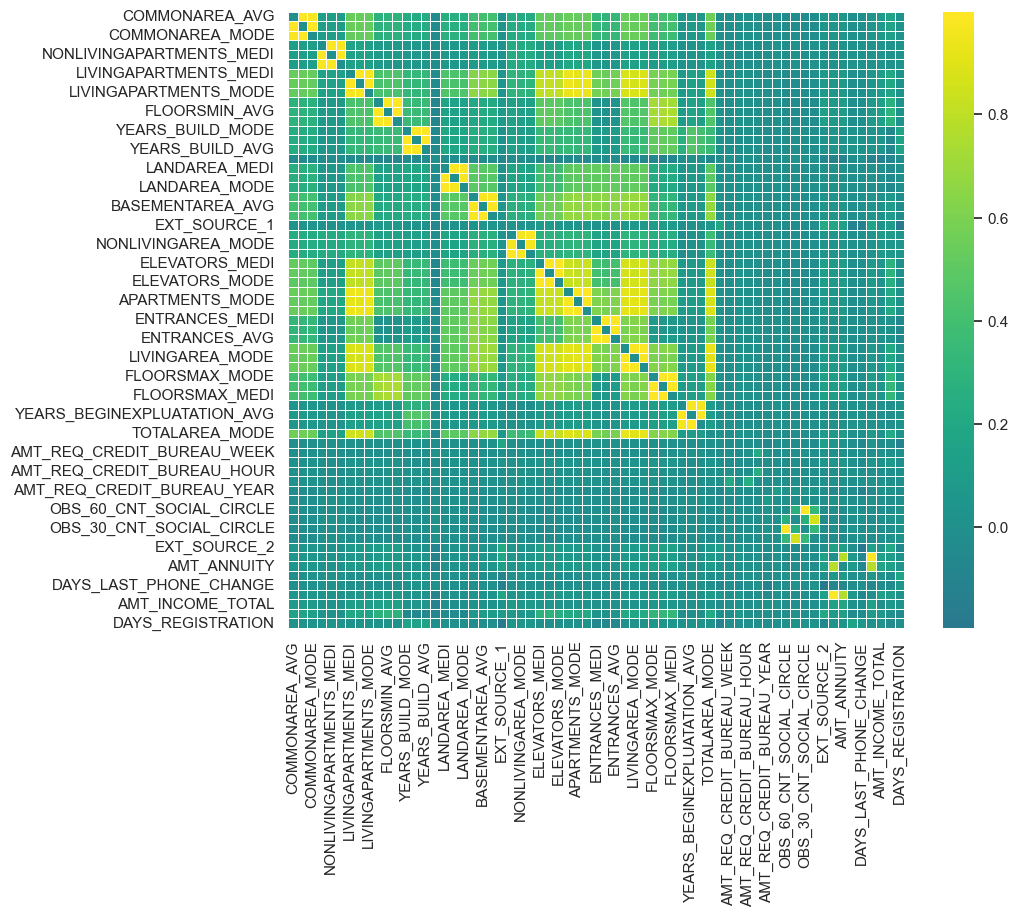

0

In [18]:
f_aux.get_corr_matrix(dataset = df_loan_train[list_var_continuous], 
                metodo='pearson', size_figure=[10,8])

De las correlaciones observadas me gustaría destacar dos de ellas:

1. Observamos como AMT_CREDIT y AMT_ANNUITY tienen una correlación positiva del 77%, es decir, si aumenta la cantidad de dinero prestado al cliente, aumenta la anualidad de la solicitud anterior.

2. AMT_CREDIT Y AMT_GOOD_PRICES presentan una correlación lineal positiva del 99%, es decir, cuanto mayor es cantidad prestada al cliente, mayor es el valor de sus bienes para los que se le ha concedido el préstamo. Esto es algo lógico.

Además de estas dos correlaciones, la variable 'TARGET' no está altamente correlacionada y no hay variables que expliquen el comportamiento de nuestra variable objetivo.

In [19]:
corr.loc['TARGET'].sort_values(ascending=False)

TARGET                          1.000000
DAYS_BIRTH                      0.079674
REGION_RATING_CLIENT_W_CITY     0.061004
REGION_RATING_CLIENT            0.058763
DAYS_LAST_PHONE_CHANGE          0.054102
DAYS_ID_PUBLISH                 0.050674
DAYS_REGISTRATION               0.043485
OWN_CAR_AGE                     0.035697
DEF_30_CNT_SOCIAL_CIRCLE        0.032425
DEF_60_CNT_SOCIAL_CIRCLE        0.031405
AMT_REQ_CREDIT_BUREAU_YEAR      0.019654
CNT_CHILDREN                    0.018425
OBS_30_CNT_SOCIAL_CIRCLE        0.007944
OBS_60_CNT_SOCIAL_CIRCLE        0.007903
CNT_FAM_MEMBERS                 0.007631
AMT_REQ_CREDIT_BUREAU_DAY       0.003713
AMT_REQ_CREDIT_BUREAU_HOUR      0.002033
AMT_REQ_CREDIT_BUREAU_WEEK      0.000180
NONLIVINGAPARTMENTS_MODE       -0.001125
SK_ID_CURR                     -0.001609
NONLIVINGAPARTMENTS_MEDI       -0.002170
AMT_REQ_CREDIT_BUREAU_QRT      -0.002310
AMT_INCOME_TOTAL               -0.002392
NONLIVINGAPARTMENTS_AVG        -0.002504
YEARS_BEGINEXPLU

Ninguna variable explica de una manera muy grande a la variable Target, algo que parece normal en un problema tan complejo como es la detección de dificultad en pago de préstamos.


## Tratamiento de valores nulos

El tratamiento de valores nulos depende del contexto en el que estemos trabajando, la naturaleza de los datos y el impacto que los valores ausentes pueden tener en tu análisis o modelo de machine learning. En general hay varias opciones a la hora de imputar nuestros valores nulos:

1. Imputar los valores numéricos mediante la media si nuestras variables siguen una distribución normal o mediante la mediana cuando presenten valores atípicos. Imputar un valor fijo o predeterminado, o utilizar un algoritmo de imputación avanzada (KNN) que predice los valores ausentes en función de los valores de otras columnas.

2. Imputar los valores categóricos mediante la moda cuando las variables presentan valores dominantes, asignar un valor fijo como pudiera ser 'Desconocido'.

En mi caso, al no tener mucho contexto de las variables, decidiré imputar los valores nulos de las variables categóricas por un valor fijo 'Desconocido' ya que realmente no conocemos la naturaleza de esos valores nulos. Prefiero no imputar por moda, ya que en algunas variables categóricas realmente no observamos un valor predominante sobre los demás, por lo que podríamos distorsionar la distribución de dichas variables.

En el caso de las numéricas, optaré por imputar la mediana ya que la mayoría de las variables numéricas no siguen una distribución normal y a pesar de no presentar un gran porcentaje de valores atípicos la mediana no se ve afectada por valores extremos, a diferencia de la media. Además, los modelos de machine learning suelen ser sensibles a valores extremos. Usar la mediana reduce la posibilidad de que los valores imputados introduzcan ruido o sesgo no deseado.

En el caso de las variables booleanas, variables que toman el valor 0 o 1, si que optaré por imputar su moda, ya que no tiene sentido imputar por su mediana si verdaderamente su distribución toman dos únicos valores.

In [20]:
list_cat_vars, other = f_aux.dame_variables_categoricas(dataset=df_loan_train)

# Nos aseguramos de que las columnas categóricas permitan la categoría 'Desconocido'
for col in list_cat_vars:
    if pd.api.types.is_categorical_dtype(df_loan_train[col]):
        # Agregar 'Desconocido' como categoría si no existe
        df_loan_train[col] = df_loan_train[col].cat.add_categories(['Desconocido'])

# Imputar valores nulos con 'Desconocido'
df_loan_train[list_cat_vars] = df_loan_train[list_cat_vars].fillna(value='Desconocido')


df_loan_train[list_cat_vars]

C:\Users\RAMON\AppData\Local\Temp\ipykernel_6564\1574133440.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_loan_train[col]):


FONDKAPREMONT_MODE WALLSMATERIAL_MODE  HOUSETYPE_MODE  \
224579        Desconocido        Desconocido     Desconocido   
198770        Desconocido        Desconocido     Desconocido   
259173        Desconocido        Desconocido     Desconocido   
247800        Desconocido        Desconocido     Desconocido   
21166         Desconocido       Stone, brick  block of flats   
...                   ...                ...             ...   
244634        Desconocido        Desconocido     Desconocido   
283203   reg oper account       Stone, brick  terraced house   
180127        Desconocido              Panel  block of flats   
84270    org spec account              Panel  block of flats   
70998         Desconocido        Desconocido     Desconocido   

       EMERGENCYSTATE_MODE OCCUPATION_TYPE NAME_TYPE_SUITE  \
224579         Desconocido      Core staff   Unaccompanied   
198770         Desconocido     Desconocido   Unaccompanied   
259173                  No         Drivers   Unaccompanied   
247800         Desconocido     Desconocido   Unaccompanied   
21166                   No      Core staff   Unaccompanied   
...                    ...             ...             ...   
244634         Desconocido  Security staff   Unaccompanied   
283203                  No        Laborers   Unaccompanied   
180127                  No        Laborers         Other_B   
84270                   No        Laborers   Unaccompanied   
70998          Desconocido     Sales staff   Unaccompanied   

             ORGANIZATION_TYPE NAME_CONTRACT_TYPE FLAG_OWN_CAR CODE_GENDER  \
224579                  Postal         Cash loans            N           F   
198770       Transport: type 4         Cash loans            N           F   
259173           Self-employed         Cash loans            Y           M   
247800                     XNA         Cash loans            N           F   
21166                     Bank    Revolving loans            N           F   
...                        ...                ...          ...         ...   
244634                Security         Cash loans            N           M   
283203                   Other    Revolving loans            N           M   
180127  Business Entity Type 3         Cash loans            N           F   
84270   Business Entity Type 3         Cash loans            Y           M   
70998                 Services         Cash loans            N           F   

            NAME_INCOME_TYPE    NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
224579               Working               Married    House / apartment   
198770  Commercial associate             Separated    House / apartment   
259173               Working               Married    House / apartment   
247800             Pensioner               Married    House / apartment   
21166   Commercial associate  Single / not married    House / apartment   
...                      ...                   ...                  ...   
244634               Working  Single / not married    House / apartment   
283203  Commercial associate  Single / not married         With parents   
180127  Commercial associate             Separated  Municipal apartment   
84270                Working               Married    House / apartment   
70998                Working               Married    House / apartment   

                  NAME_EDUCATION_TYPE FLAG_OWN_REALTY  \
224579  Secondary / secondary special               Y   
198770  Secondary / secondary special               Y   
259173  Secondary / secondary special               Y   
247800               Higher education               Y   
21166               Incomplete higher               Y   
...                               ...             ...   
244634  Secondary / secondary special               Y   
283203  Secondary / secondary special               N   
180127  Secondary / secondary special               N   
84270   Secondary / secondary special               Y   
70998               Incomple

No observamos valores nulos en nuestras columnas que presentan valores booleanos, aunque si tuvieramos presencia de ellos y nos surgiera la necesidad de imputar la moda en lugar de esos valores, podríamos utilizar el bucle descrito en el siguiente código.

In [21]:
df_loan_train[df_loan_bool].isnull().sum()

# for col in df_loan_train.select_dtypes(include=['bool']).columns:
    # Calcular la moda de la columna
#    moda = df_loan_train[col].mode()[0]
    # Sustituir los valores nulos con la moda
#    df_loan_train[col] = df_loan_train[col].fillna(moda)

REG_REGION_NOT_LIVE_REGION     0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
TARGET                         0
LIVE_REGION_NOT_WORK_REGION    0
FLAG_EMAIL                     0
FLAG_PHONE                     0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
REG_REGION_NOT_WORK_REGION     0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_15               0
FLAG_DOCUM

In [22]:
# Imputar valores nulos en columnas numéricas con la mediana
for col in df_loan_train.select_dtypes(include=['number']).columns:
    # Calcular la mediana de la columna
    mediana = df_loan_train[col].median()
    # Sustituir los valores nulos con la mediana
    df_loan_train[col] = df_loan_train[col].fillna(mediana)

df_loan_train[df_loan_num].head(10)

SK_ID_CURR  COMMONAREA_AVG  COMMONAREA_MEDI  COMMONAREA_MODE  \
224579      360111          0.0211           0.0209           0.0191   
198770      330459          0.0211           0.0209           0.0191   
259173      399930          0.0211           0.0209           0.0191   
247800      386717          0.0211           0.0209           0.0191   
21166       124666          0.0211           0.0209           0.0191   
120403      239607          0.0211           0.0209           0.0191   
70446       181725          0.0211           0.0209           0.0191   
231236      367833          0.0211           0.0209           0.0191   
63642       173806          0.0211           0.0209           0.0191   
258606      399276          0.0211           0.0209           0.0191   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAPARTMENTS_MEDI  \
224579                      0.0                       0.0   
198770                      0.0                       0.0   
259173                      0.0                       0.0   
247800                      0.0                       0.0   
21166                       0.0                       0.0   
120403                      0.0                       0.0   
70446                       0.0                       0.0   
231236                      0.0                       0.0   
63642                       0.0                       0.0   
258606                      0.0                       0.0   

        NONLIVINGAPARTMENTS_MODE  LIVINGAPARTMENTS_MEDI  LIVINGAPARTMENTS_AVG  \
224579                       0.0                 0.0761                0.0756   
198770                       0.0                 0.0761                0.0756   
259173                       0.0                 0.0761                0.0756   
247800                       0.0                 0.0761                0.0756   
21166                        0.0                 0.0761                0.0756   
120403                       0.0                 0.0761                0.0756   
70446                        0.0                 0.0761                0.0756   
231236                       0.0                 0.0761                0.0756   
63642                        0.0                 0.0761                0.0756   
258606                       0.0                 0.0761                0.0756   

        LIVINGAPARTMENTS_MODE  FLOORSMIN_AVG  YEARS_BUILD_MODE  \
224579                 0.0762         0.2083            0.7648   
198770                 0.0762         0.2083            0.7648   
259173                 0.0762         0.2083            0.7648   
247800                 0.0762         0.2083            0.7648   
21166                  0.0762         0.2083            0.7648   
120403                 0.0762         0.2083            0.7648   
70446                  0.0762         0.2083            0.7648   
231236                 0.0762         0.2083            0.7648   
63642                  0.0762         0.2083            0.7648   
258606                 0.0762         0.2083            0.7648   

        YEARS_BUILD_MEDI  YEARS_BUILD_AVG  OWN_CAR_AGE  LANDAREA_MEDI  \
224579            0.7585           0.7552          9.0         0.0486   
198770            0.7585           0.7552          9.0         0.0486   
259173            0.7585           0.7552         10.0         0.0486   
247800            0.7585           0.7552          9.0         0.0486   
21166             0.7585           0.7552          9.0         0.0207   
120403            0.7585           0.7552          9.0         0.0486   
70446             0.7585           0.7552          2.0         0.0486   
231236            0.7585           0.7552         10.0         0.0486   
63642             0.7585           0.7552          9.0         0.0486   
258606            0.7585           0.7552          9.0         0.4664   

        LANDAREA_AVG  LANDAREA_MODE  BASEMENTAREA_MODE  BASEMENTAREA_AVG  \
224579        0.0481         0.0458         

In [23]:
f_aux.get_percent_null_values_target(df_loan_train, [i for i in list_var_continuous], target='TARGET')

No existen variables con valores nulos


Empty DataFrame
Columns: []
Index: []

Nos aseguramos que todas las imputaciones de valores nulos se han realizado de manera exitosa.

#### Matriz de correlación para variables categóricas: Cramers V matrix

Debido a que no podemos ver la correlación de las variables categóricas con el estadístico de Pearson, vamos a acercarnos lo máximo posible con el estadístico de V Cramers. Podremos observar la correlación de nuestras variables categóricas.

Si bien aunque nuestras variables booleanas que toman valores de 0 o 1 son numéricas, su verdadero origen e interpretación es categórica, ya que si toma valor de 0 pertenece a una categoría distinta de si tomara valor de 1. Por tanto, trataremos a estas como tal y realizaremos su correlación según la V de Cramers.

In [24]:
df_cat_bool = pd.concat([df_loan_train[df_loan_cat], df_loan_train[df_loan_bool]], axis=1)
df_cat_bool.columns.values

array(['FONDKAPREMONT_MODE', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'NAME_TYPE_SUITE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'CODE_GENDER', 'CNT_CHILDREN', 'NAME_INCOME_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE',
       'FLAG_OWN_REALTY', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'FLAG_MOBIL', '

In [25]:
confusion_matrix = pd.crosstab(df_loan_train["TARGET"], df_loan_train["NAME_CONTRACT_TYPE"])
print(confusion_matrix)
f_aux.cramers_v(confusion_matrix.values)

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
TARGET                                         
0                       203962            22186
1                        18602             1258


np.float64(0.0321614398186661)

In [26]:
confusion_matrix = pd.crosstab(df_loan_train["TARGET"], df_loan_train["TARGET"])
f_aux.cramers_v(confusion_matrix.values)

np.float64(0.9999726127135284)

In [27]:
corr_cats = f_aux.corr_cat(df=df_cat_bool, target='TARGET' ,target_transform=True)
corr_cats

FONDKAPREMONT_MODE  WALLSMATERIAL_MODE  \
FONDKAPREMONT_MODE                    1.000000            0.350203   
WALLSMATERIAL_MODE                    0.350203            1.000000   
HOUSETYPE_MODE                        0.396007            0.559535   
EMERGENCYSTATE_MODE                   0.461296            0.688372   
OCCUPATION_TYPE                       0.030400            0.031864   
NAME_TYPE_SUITE                       0.016862            0.014215   
NAME_CONTRACT_TYPE                    0.021285            0.028629   
FLAG_OWN_CAR                          0.017591            0.037964   
CODE_GENDER                           0.011962            0.020773   
NAME_INCOME_TYPE                      0.028182            0.031248   
NAME_FAMILY_STATUS                    0.024100            0.033712   
NAME_HOUSING_TYPE                     0.031347            0.044321   
NAME_EDUCATION_TYPE                   0.043506            0.062878   
FLAG_OWN_REALTY                       0.016955            0.028917   
WEEKDAY_APPR_PROCESS_START            0.006072            0.004122   
TARGET                                0.032267            0.044359   

                            HOUSETYPE_MODE  EMERGENCYSTATE_MODE  \
FONDKAPREMONT_MODE                0.396007             0.461296   
WALLSMATERIAL_MODE                0.559535             0.688372   
HOUSETYPE_MODE                    1.000000             0.669468   
EMERGENCYSTATE_MODE               0.669468             1.000000   
OCCUPATION_TYPE                   0.045672             0.056216   
NAME_TYPE_SUITE                   0.019300             0.025375   
NAME_CONTRACT_TYPE                0.027984             0.027989   
FLAG_OWN_CAR                      0.035882             0.037710   
CODE_GENDER                       0.020347             0.021576   
NAME_INCOME_TYPE                  0.042596             0.054188   
NAME_FAMILY_STATUS                0.044161             0.055451   
NAME_HOUSING_TYPE                 0.045728             0.060720   
NAME_EDUCATION_TYPE               0.066959             0.085310   
FLAG_OWN_REALTY                   0.023155             0.022256   
WEEKDAY_APPR_PROCESS_START        0.004219             0.005748   
TARGET                            0.041362             0.042662   

                            OCCUPATION_TYPE  NAME_TYPE_SUITE  \
FONDKAPREMONT_MODE                 0.030400         0.016862   
WALLSMATERIAL_MODE                 0.031864         0.014215   
HOUSETYPE_MODE                     0.045672         0.019300   
EMERGENCYSTATE_MODE                0.056216         0.025375   
OCCUPATION_TYPE                    1.000000         0.020745   
NAME_TYPE_SUITE                    0.020745         1.000000   
NAME_CONTRACT_TYPE                 0.061095         0.030216   
FLAG_OWN_CAR                       0.257541         0.043254   
CODE_GENDER                        0.359205         0.043831   
NAME_INCOME_TYPE                   0.289141         0.019926   
NAME_FAMILY_STATUS                 0.091063         0.063608   
NAME_HOUSING_TYPE                  0.043735         0.018584   
NAME_EDUCATION_TYPE                0.187101         0.024534   
FLAG_OWN_REALTY                    0.047221         0.075353   
WEEKDAY_APPR_PROCESS_START         0.017982         0.017147   
TARGET                             0.080278         0.011513   

                            NAME_CONTRACT_TYPE  FLAG_OWN_CAR  CODE_GENDER  \
FONDKAPREMONT_MODE                    0.021285      0.017591     0.011962   
WALLSMATERIAL_MODE                    0.028629      0.037964     0.020773   
HOUSETYPE_MODE                        0.027984      0.035882     0.020347   
EMERGENCYSTATE_MODE                   0.027989      0.037710     0.021576   
OCCUPATION_TYPE                       0.061095      0.257541     0.359205   
NAME_TYPE_SUITE                       0.030216      0.043254     0.043831   
NAME_CONTRACT_TYPE                    0.999976      0.003065     0.01

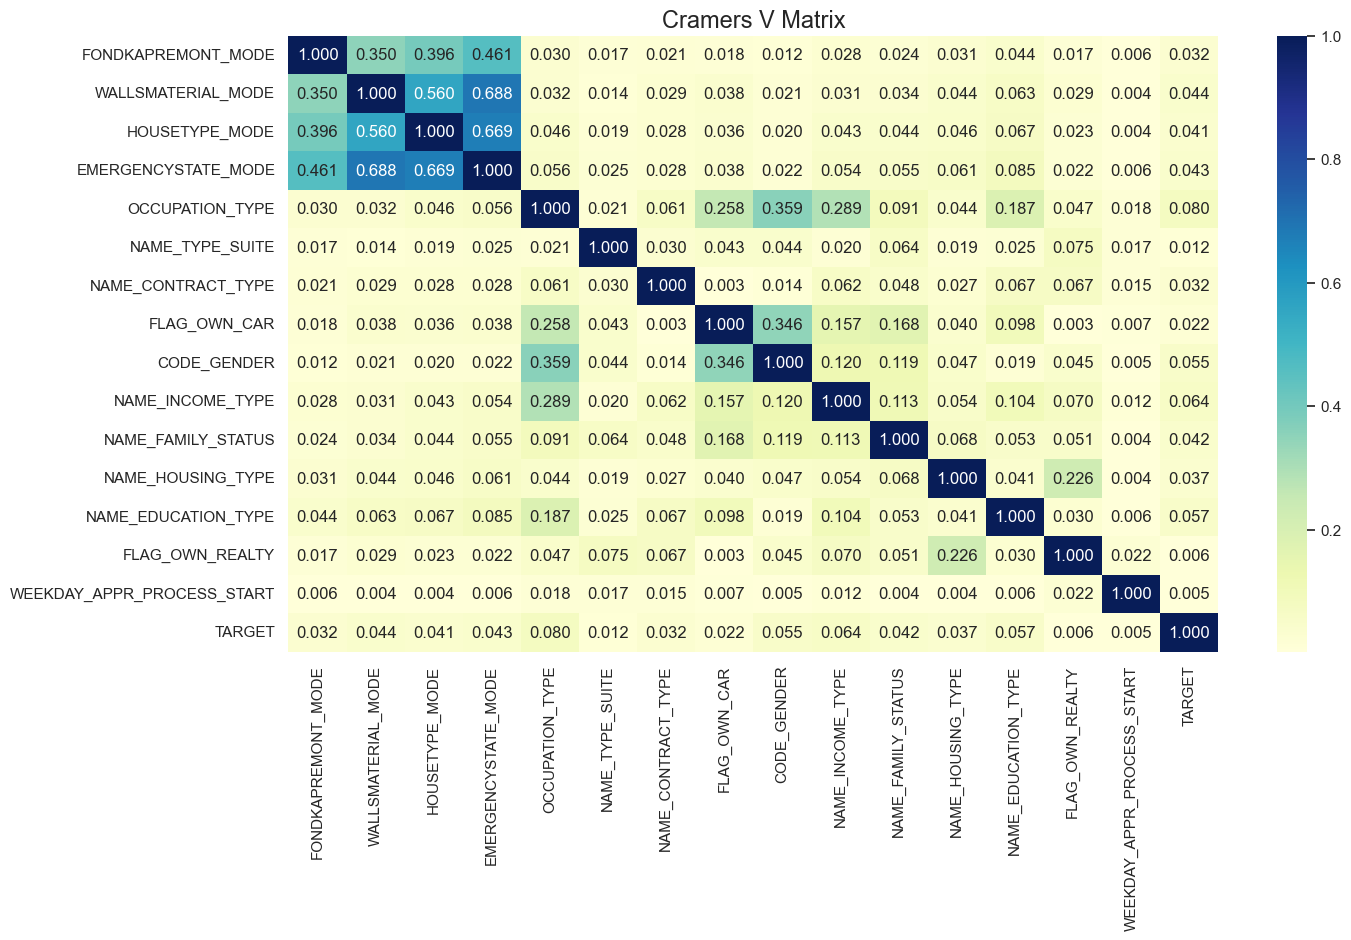

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_cats, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Cramers V Matrix', fontdict={'size':'17'})
plt.show()

In [29]:
warnings.filterwarnings("ignore")

corr_bool = f_aux.corr_cat_boolean(df_loan_train[df_loan_bool])
corr_bool

REG_REGION_NOT_LIVE_REGION  FLAG_MOBIL  \
REG_REGION_NOT_LIVE_REGION                     0.999863    0.000000   
FLAG_MOBIL                                     0.000000    0.499995   
FLAG_EMP_PHONE                                 0.036343    0.000000   
FLAG_WORK_PHONE                                0.063263    0.000000   
FLAG_CONT_MOBILE                               0.000000    0.000000   
TARGET                                         0.004281    0.000000   
LIVE_REGION_NOT_WORK_REGION                    0.086202    0.000000   
FLAG_EMAIL                                     0.018153    0.000000   
FLAG_PHONE                                     0.001804    0.000000   
REG_CITY_NOT_LIVE_CITY                         0.339508    0.000000   
REG_CITY_NOT_WORK_CITY                         0.143395    0.000000   
LIVE_CITY_NOT_WORK_CITY                        0.010176    0.000000   
REG_REGION_NOT_WORK_REGION                     0.451384    0.000000   
FLAG_DOCUMENT_4                                0.000000    0.000000   
FLAG_DOCUMENT_5                                0.009529    0.000000   
FLAG_DOCUMENT_2                                0.000000    0.000000   
FLAG_DOCUMENT_3                                0.033563    0.000000   
FLAG_DOCUMENT_11                               0.097953    0.000000   
FLAG_DOCUMENT_10                               0.001417    0.000000   
FLAG_DOCUMENT_9                                0.017236    0.000000   
FLAG_DOCUMENT_8                                0.024049    0.002335   
FLAG_DOCUMENT_7                                0.000000    0.000000   
FLAG_DOCUMENT_6                                0.023321    0.000000   
FLAG_DOCUMENT_12                               0.000000    0.000000   
FLAG_DOCUMENT_13                               0.001233    0.000000   
FLAG_DOCUMENT_19                               0.001122    0.000000   
FLAG_DOCUMENT_18                               0.008326    0.010826   
FLAG_DOCUMENT_17                               0.000000    0.000000   
FLAG_DOCUMENT_16                               0.006216    0.000000   
FLAG_DOCUMENT_15                               0.000000    0.000000   
FLAG_DOCUMENT_14                               0.000000    0.000000   
FLAG_DOCUMENT_20                               0.000000    0.000000   
FLAG_DOCUMENT_21                               0.005341    0.000000   

                             FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
REG_REGION_NOT_LIVE_REGION         0.036343         0.063263   
FLAG_MOBIL                         0.000000         0.000000   
FLAG_EMP_PHONE                     0.999986         0.233870   
FLAG_WORK_PHONE                    0.233870         0.999987   
FLAG_CONT_MOBILE                   0.012323         0.021699   
TARGET                             0.046572         0.027682   
LIVE_REGION_NOT_WORK_REGION        0.096109         0.039273   
FLAG_EMAIL                         0.062575         0.011683   
FLAG_PHONE                         0.016018         0.292275   
REG_CITY_NOT_LIVE_CITY             0.092552         0.046085   
REG_CITY_NOT_WORK_CITY             0.256324         0.120157   
LIVE_CITY_NOT_WORK_CITY            0.219078         0.109069   
REG_REGION_NOT_WORK_REGION         0.108088         0.065930   
FLAG_DOCUMENT_4                    0.000000         0.003381   
FLAG_DOCUMENT_5                    0.018725         0.036760   
FLAG_DOCUMENT_2                    0.001195         0.000000   
FLAG_DOCUMENT_3                    0.248460         0.061026   
FLAG_DOCUMENT_11                   0.029295         0.123804   
FLAG_DOCUMENT_10                   0.000000         0.000605   
FLAG_DOCUMENT_9                    0.023315         0.006226   
FLAG_DOCUMENT_8                    0.122734         0.021035   
FLAG_DOCUMENT_7                    0.001046         0.000000   
FLAG_DOCUMENT_6                    0.598624         0.138948   
FLAG_DOCUMENT_12                   0.000000         0.000000   
FLAG_DOCUMENT_

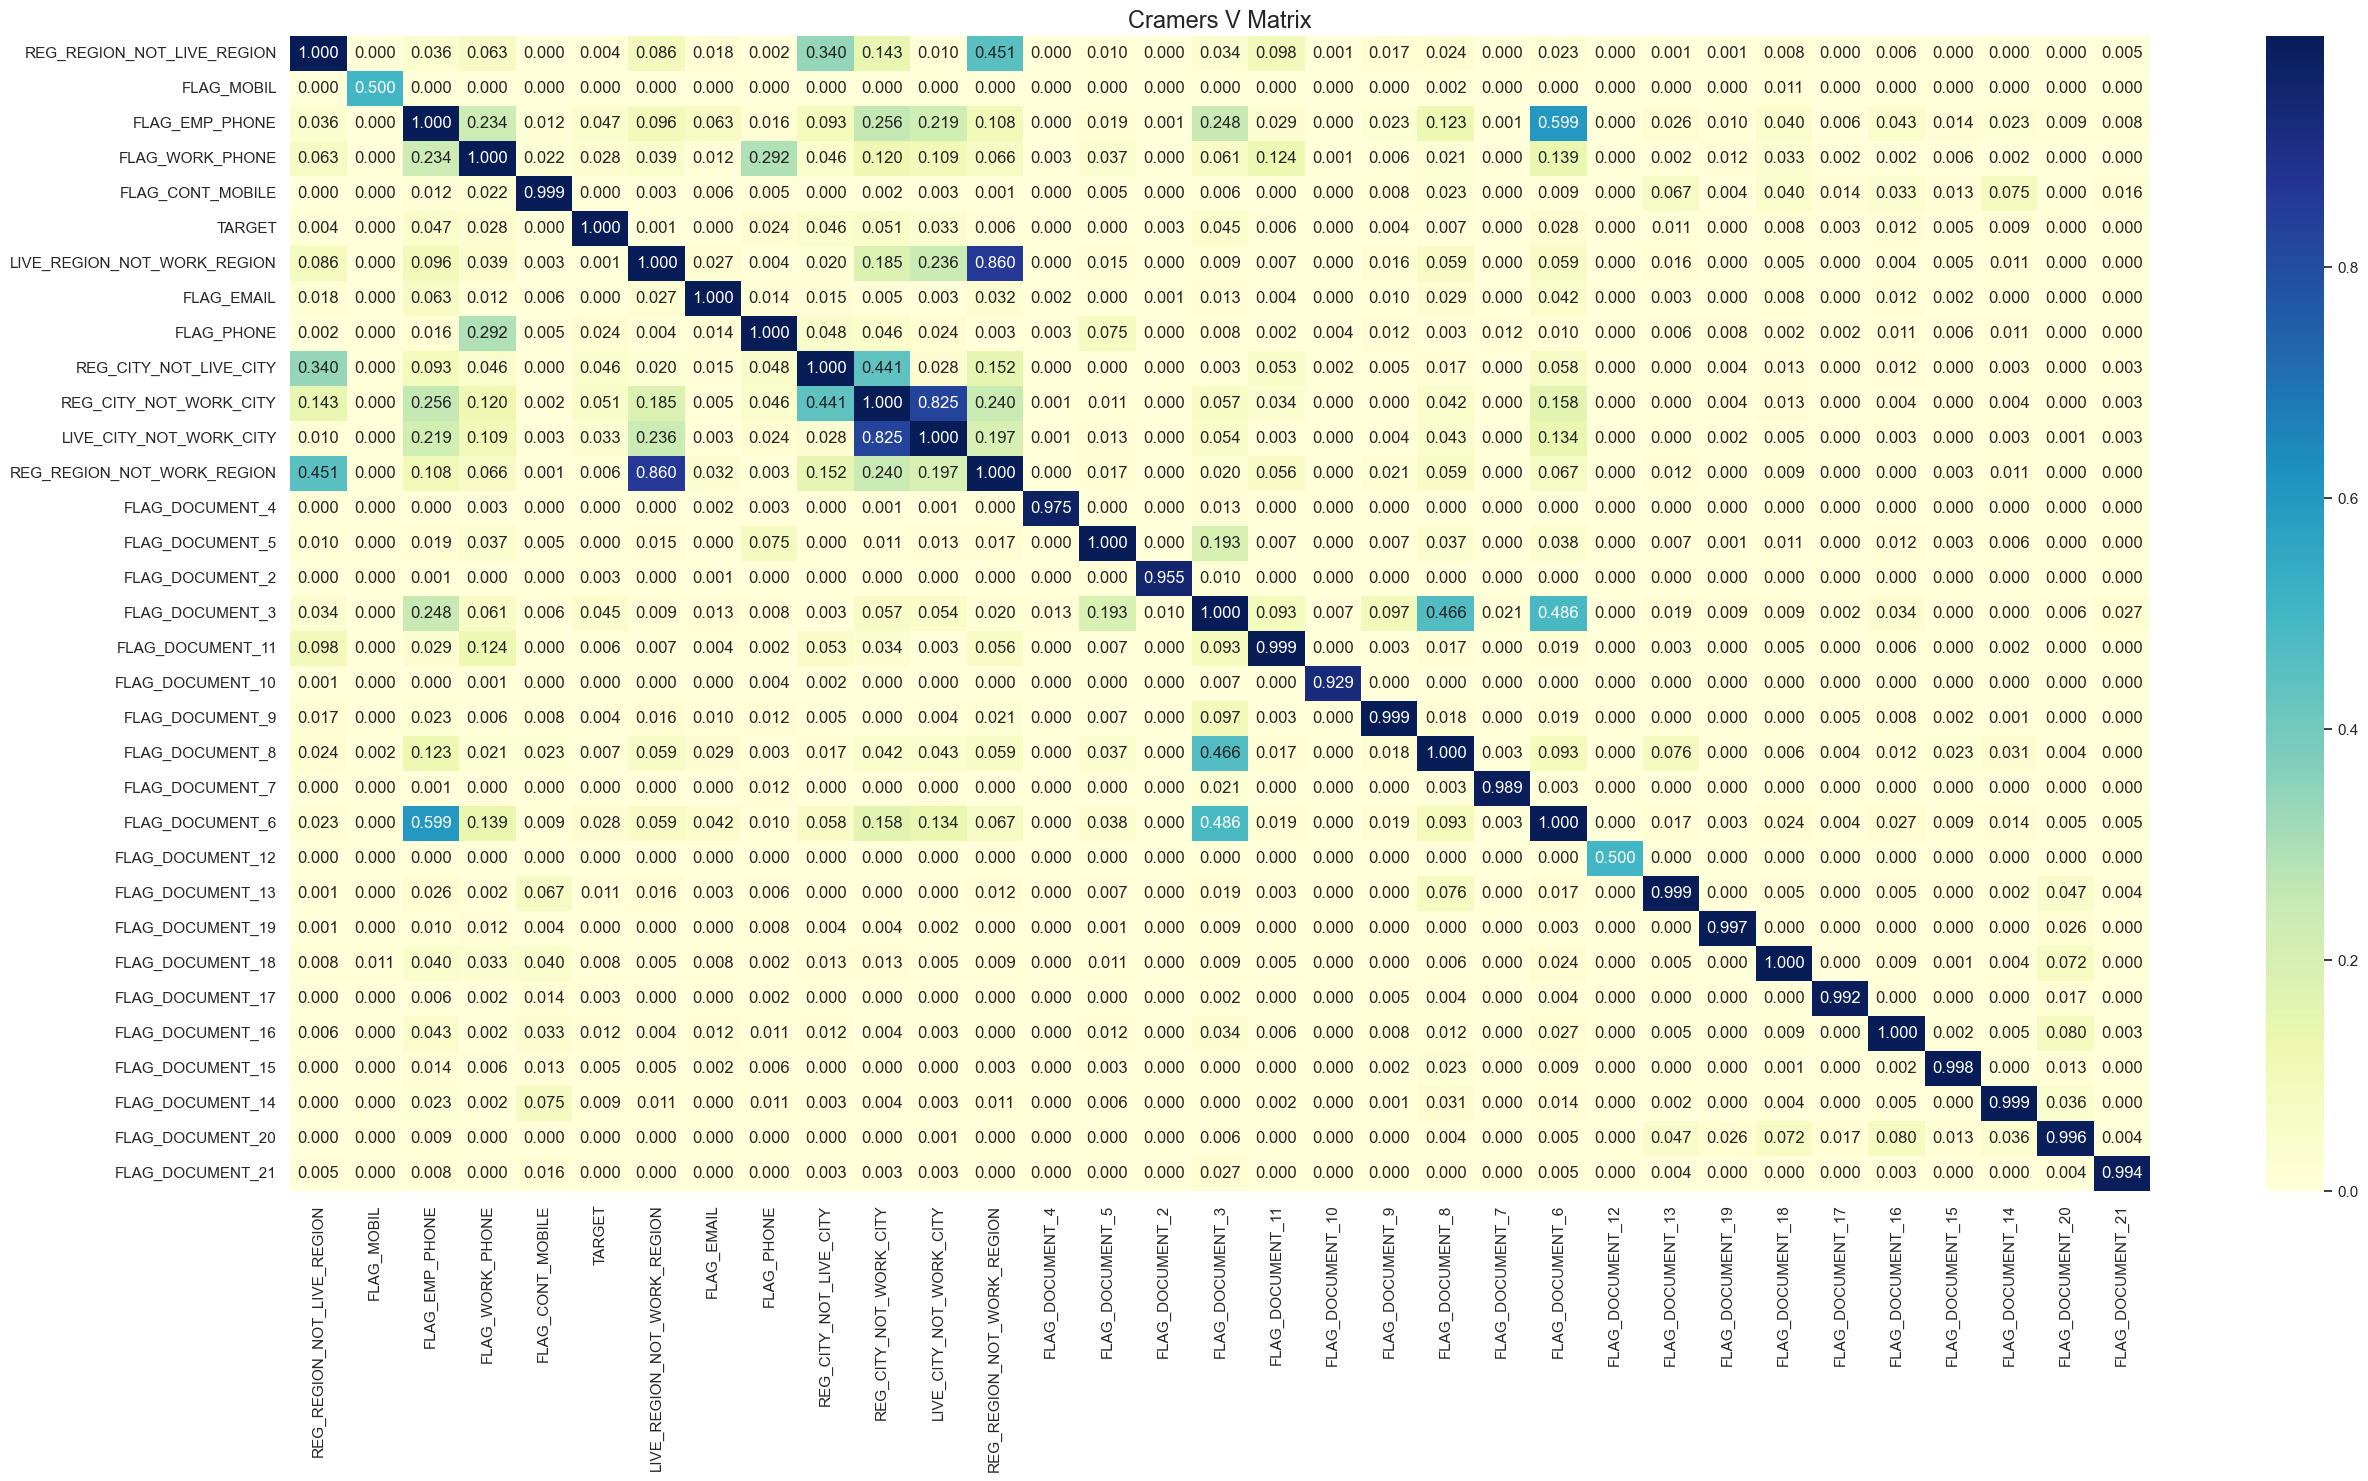

In [30]:
plt.figure(figsize=(30,15))
sns.heatmap(corr_bool, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Cramers V Matrix', fontdict={'size':'17'})
plt.show()

Si bien no se observan correlaciones muy altas de las diferentes variables categóricas y booleanas con nuestra variable target, la variable que tiene la correlación más alta es OCCUPATION_TYPE, que comentamos anteriormente en en análisis gráfico. Esta variable presenta una correlación del 8%, aunque no es mucho si que podría tener importancia en el modelo.

Destacar correlaciones entre el 30% y el 70% entre variables como pueden ser el tipo de vivienda y sus materiales de construcción, además de las características de las viviendas. Esta alta relación no es preocupante ya que se trata de una relación lógica.

También observar una correlación del 42.3% entre el nombre del puesto de trabajo que ocupa el cliente y el tipo de empresa en la que trabaja. A priori también una relación normal y no preocupante.


## Weight of Evidence (WoE) e Information Value (IV)

El WoE es una medida que transforma una variable categórica o continua en una escala que refleja la relación entre las probabilidades de los dos grupos de la variable dependiente (por ejemplo, "fraude" y "no fraude"). Se calcula de la siguiente manera:

$$ WoE = ln (Distribución de la clase positiva/Distribución de la clase negativa) $$

Interpretación:

- Si WoE > 0, la categoría tiene una mayor proporción de positivos (indicando un buen predictor para la clase positiva).
- Si WoE < 0, la categoría tiene una mayor proporción de negativos (indicando un buen predictor para la clase negativa).
- WoE = 0 indica que la categoría tiene una distribución balanceada entre positivos y negativos, lo que no aporta mucha información.

#

El Information Value (IV) es una métrica que ayuda a cuantificar la capacidad predictiva de una variable con respecto a la variable objetivo (target). Es una medida acumulada de las diferencias entre las proporciones de positivos y negativos en cada grupo.

El IV se calcula sumando los valores de WoE ponderados por la diferencia entre las proporciones de positivos y negativos en cada grupo:

$$ IV = ∑(Proporción de la clase positiva − Proporción de la clase negativa) × WoE $$

Interpretación del IV:

- IV < 0.02: Baja capacidad predictiva.
- 0.02 < IV < 0.1: Capacidad predictiva débil.
- 0.1 < IV < 0.3: Capacidad predictiva moderada.
- 0.3 < IV < 0.5: Alta capacidad predictiva.
- IV > 0.5: Muy alta capacidad predictiva (aunque se debe tener precaución de no sobreajustar el modelo).

A continuación vamos a calcular el WOE y el IV para algunas variables categóricas que me parecen interesantes. De las que posteriormente comentaremos las conclusiones.

In [31]:
woe_dict, iv = f_aux.calculate_woe_iv_categorical(df=df_loan_train, variable='OCCUPATION_TYPE', target='TARGET')

print("WoE por categoría:", woe_dict)
print("IV de la variable:", iv)

WoE por categoría: {'Accountants': np.float64(-0.5422081580312527), 'Cleaning staff': np.float64(0.19581055434307537), 'Cooking staff': np.float64(0.29698713265816096), 'Core staff': np.float64(-0.2820535656516379), 'Drivers': np.float64(0.37548462915234715), 'HR staff': np.float64(-0.32068864280277753), 'High skill tech staff': np.float64(-0.2625923985991576), 'IT staff': np.float64(-0.1073404138042128), 'Laborers': np.float64(0.3070091196352302), 'Low-skill Laborers': np.float64(0.8489075917357212), 'Managers': np.float64(-0.28683593236865), 'Medicine staff': np.float64(-0.167924675718364), 'Private service staff': np.float64(-0.19910704142783053), 'Realty agents': np.float64(0.0035339974399463962), 'Sales staff': np.float64(0.1816640775886295), 'Secretaries': np.float64(-0.1656310248370698), 'Security staff': np.float64(0.3178300277532575), 'Waiters/barmen staff': np.float64(0.3673702774548912), 'Desconocido': np.float64(-0.23765090541184677)}
IV de la variable: 0.0841133734510854


In [33]:
woe_dict, iv = f_aux.calculate_woe_iv_categorical(df=df_loan_train, variable='NAME_INCOME_TYPE', target='TARGET')

print("WoE por categoría:", woe_dict)
print("IV de la variable:", iv)

WoE por categoría: {'Businessman': 0, 'Commercial associate': np.float64(-0.08192373617332918), 'Maternity leave': np.float64(2.4324819935799025), 'Pensioner': np.float64(-0.4411231876844893), 'State servant': np.float64(-0.34969500125685493), 'Student': 0, 'Unemployed': np.float64(1.8934854928472151), 'Working': np.float64(0.1887535603666426), 'Desconocido': 0}
IV de la variable: 0.058859457184226235


In [36]:
woe_dict, iv = f_aux.calculate_woe_iv_categorical(df=df_loan_train, variable='NAME_EDUCATION_TYPE', target='TARGET')

print("WoE por categoría:", woe_dict)
print("IV de la variable:", iv)

WoE por categoría: {'Academic degree': np.float64(-1.7106527328116305), 'Higher education': np.float64(-0.4383954228284626), 'Incomplete higher': np.float64(0.04094941456936032), 'Lower secondary': np.float64(0.28986155027853455), 'Secondary / secondary special': np.float64(0.1122242316086739), 'Desconocido': 0}
IV de la variable: 0.05027314566172141


In [37]:
woe_dict, iv = f_aux.calculate_woe_iv_categorical(df=df_loan_train, variable='CODE_GENDER', target='TARGET')

print("WoE por categoría:", woe_dict)
print("IV de la variable:", iv)

WoE por categoría: {'F': np.float64(-0.1548384896121467), 'M': np.float64(0.2514014058788771), 'XNA': 0, 'Desconocido': 0}
IV de la variable: 0.038801869057569535


Voy a comentar mis conclusiones de las 4 variables analizadas:
- En la variable 'OCCUPATION_TYPE' se observa como en trabajos menos cualificados el coeficiente WoE es positivo, es decir, cuanto mayor sea el coeficiente, mayor proporción de 1 en TARGET tendrán este tipo de trabajos. Por tanto, los clientes con trabajos poco cualificados como 'low-skill laborers', 'Drivers', 'Security Staff' o 'Waiters' muestran mayor proporción de 1 en TARGET (dificultad de pago). A su vez, clientes con trabajos más cualificados tienen coeficientes negativos, que supone que la categoría tiene una mayor proporción de clientes con TARGET = 0.

- En la variable 'NAME_INCOME_TYPE' observamos como 'Unemployed' y 'Maternity leave' tienen un gran coeficiente positivo, por lo que son buenos predictores para TARGET = 1 (dificultad de pago). Por otro lado, 'Pensioner' y 'State servant' tienen coeficientes negativos, que supone que la categoría tiene una mayor proporción de clientes con TARGET = 0. 'Businessman' tiene un valor de 0, lo que significa que la categoría tiene una distribución balanceada entre positivos y negativos

- En la variable 'EDUCATION_TYPE' los clientes con mejor educación tienen coeficientes negativos y los clientes de menor educación tienen coeficientes positivos. En principio, es algo lógico.

- La variable 'CODE_GENDER' me parece interesante, pues los hombres 'M' tienen mayor coeficiente que las mujeres 'F', por tanto, a priori la mayoría de la proporción de TARGET = 1 (dificultad de pago) se corresponde a clientes varones.
#
Como conclusión acerca del IV, observamos que todos los valores se encuentran en el intervalo 0.02 < IV < 0.1, por tanto, las variables presentan una capacidad predictiva débil. Esto ocurre ya que es necesario combinar varias variables para forjar una capacidad predictiva fuerte, si una única variable tuviera mucho poder predictivo sobre la variable objetivo podría generar problemas de multicolinealidad, overfitting o sesgo.

## Exportación de datasets

In [31]:
print(df_loan_train.shape, df_loan_test.shape)

(246008, 122) (61503, 122)


In [36]:
df_loan_train.to_csv('../../data_loan_status/data_split/df_loan_train.csv', index=False) 
df_loan_test.to_csv('../../data_loan_status/data_split/df_loan_test.csv', index=False)

## Conclusiones EDA

Como hipótesis inicial y respondiendo a la pregunta planteada para la práctica ¿Hay algún tipo de clientes más propenso a no devolver un préstamo? Según nuestro análisis exploratorio de los datos podríamos deducir que tipo de cliente sería más propenso a no devolver un préstamo. Destacar que este perfilado de clientes es una hipótesis propia realizada bajo mi criterio según los valores estadísticos visualizados en el EDA, que podremos contrastar cuando realicemos el Feature engineering y el modelado. En esa parte de la práctica volveremos a comentar si rechazamos o no rechazamos la hipótesis nula aqui planteada.

Según el análisis exploratorio de los datos realizados en los 2 primeros notebooks, podemos intuir que el tipo de cliente que tendrá dificultades a la hora de pagar o devolver el préstamo de manera completa será:
- Un cliente con una baja educación
- Que tenga un coche antiguo
- Un trabajo cualificadamente bajo
- Que tenga una vivienda construida con materiales pobres, especialmente madera.
- Una familia grande con mas de 2 hijos
- Que esté desempleado o de baja

Posteriormente en la realización del feature engineering y del modelado verificaremos si la hipótesis inicial planteada según mi criterio bajo la interpretación de los estadísticos realizados y visualizados se cumple.

En la realización de este análisis exploratorio de los datos hemos aprendido:

1. Entendimiento profundo de nuestros datos y de la problemática de negocio.
2. La importación de nuestros datos, dimensiones de los mismos, división y reconocimiento de las diferentes categorías aportando una visualización de las mismas.
3. Detección, graficado y análisis de nuestra variable objetivo. Concluyendo que presentaba un claro desbalanceo.
4. Separación de nuestro dataset en train y test de manera estratificada debido al desbalanceo de nuestra variable objetivo.
5. Visualización descriptiva de nuestras variables, pudiendo comprender su naturaleza, distribución e importancia en la variable objetivo.
6. Tratamiento de valores atípicos (outliers), comprendiendo la importancia de los mismos y la repercusión que pudieran tener en la fase de modelado.
7. Tratamiento de valores nulos, en todas las categorías de los datos (numéricos, booleanos y categóricos), aprendiendo y reflexionando sobre las diferentes métricas de imputación de valores nulos. Observando como afectan a la distribución y a la descripción estadística de nuestras variables.
8. Análisis de correlación de las variables, pudiendo comprender como afecta una alta correlación en nuestra variable objetivo.

Todo esto nos permitió comprender que trabajamos con un Dataset que contiene muchas variables de diferentes tipos, con las cuales buscamos explicar y predecir el comportamiento de nuestra variable objetivo, es decir, cuando un cliente puede llegar a tener dificultades en el pago de un préstamo.

Con estas conclusiones, tenemos un problema complejo por delante que supondrá un gran reto desde el punto de vista del éxito de nuestros modelos, debido a que el modelo más simple de todos sería decir que pocos clientes tendrían dificultades en el pago del préstamo, ya que sólo tendríamos error en el 8.07% de las veces. El objetivo será intentar mejorar ese porcentaje agregando complejidad a nuestro análisis.

#### Cosas a tener en cuenta a la hora de ejecutar modelos:

- Podría ser necesario balancear el modelo, con técnicas de oversampling
- Hay variables que identificamos como importantes para predecir la dificultad de pago, como OCCUPATION_TYPE (puesto de trabajo), NAME_EDUCATION_TYPE (tipo de educación), NAME_INCOME_TYPE (pensionista, estudiante, trabajador), CNT_CHILDREN (tamaño de la familia), entre otras.
- Posibilidad de realizar un Mean Encoding en vez de One-Hot encoding para variables categóricas que presenten muchas categorías.